In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C://Users//15694//Desktop//Cross selling//code//Michelle//final_data_with_Loan.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

C:\Users\15694\AppData\Local\Temp\ipykernel_4964\3053879596.py:5: DtypeWarning: Columns (2,30,31,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C://Users//15694//Desktop//Cross selling//code//Michelle//final_data_with_Loan.csv", encoding=encoding)


In [4]:
df.head()

,PROD_ID,CIFNO,ACCOUNT_NO,ACCOUNT_STATUS,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,AVG_BAL,LAST_TRAN_DATE,TOTAL_CR,TOTAL_DR,NO_CR,NO_DR,NET_FEE_INCOME,NET_INTEREST_INCOME,CURRENCY_CD,BRANCH_CD,BRANCH_NAME,REGION_CD,REGION_NAME,YEARMON_x,SUB_PROD_ID,ACCOUNT_JOINT,NO_OF_CHQ_RTN,AMOUNT_OF_CHQ_RTN,DPD,NPA_CATEGORY,DPD_LAST_3_MONTH,NPA_CATEGORY_LAST_3_MONTH,DPD_LAST_6_MONTH,NPA_CATEGORY_LAST_6_MONTH,LATEST_NPA_DATE,LIMIT_AMOUNT,INCENTIVE_AMT,SCHM_CODE,SCHM_DESC,PRODUCT_GROUP,SBU_ID_x,MATURITY_DATE,SBU_ID_y,NICNO,CUST_NAME,NPA_FLAG,NO_ACCOUNTS_SAVINGS,BAL_OS_SAVINGS,AVG_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,BAL_OS_CURRENT,AVG_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,BAL_OS_FD,AVG_BAL_OS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,BAL_OS_HOUSING,AVG_BAL_OS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,BAL_OS_TERM,AVG_BAL_OS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,BAL_OS_LEASING,AVG_BAL_OS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,BAL_OS_PAWNING,AVG_BAL_OS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,BAL_OS_PERSONAL,AVG_BAL_OS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,BAL_OS_SHORT_TERM,AVG_BAL_OS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,BAL_OS_STAFF,AVG_BAL_OS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,BAL_OS_TRADE,AVG_BAL_OS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,BAL_OS_DEVELOPMENT,AVG_BAL_OS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,BAL_OS_REFINANCE,AVG_BAL_OS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,BAL_OS_CARD,AVG_BAL_OS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,BAL_OS_OD,AVG_BAL_OS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,YEARMON_y,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,HOMELOAN_AMOUNT,PERSONALLOAN_AMOUNT,PHONE_NO,ARMCODE,ARMNAME,E_BANKING_ACCOUNTS,E_BANKING_STATUS,E_BANKING_STATEMENT,SOLO_ACCOUNTS,FINACLE_ALERT,NO_DEBIT_CARDS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,DIGITAL_APP,QSTYPE,LNAMOUNT
0,2,998101782755,103020266468,D,Savings,SAVINGS - GENERAL,0.00,0.00,2/20/2018,0.00,0.0,0.0,0.0,0.0,0.00,LKR,103,DEMATAGODA,3,Greater Colombo Region,202311,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAGEN,SAVINGS ACCOUNT GENERAL,NaN,10,NaN,10.0,197775101319,SIYAR S S,NaN,1.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,202311.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,99999,UPLOAD USER FOR ITCO (ISD CO),NaN,N,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.00,NaN,1.0,NaN
1,2,998101242090,098300061951,NaN,Savings,SAVINGS MAJOR INVESTMENT,5132.92,5120.87,NaN,NaN,NaN,NaN,NaN,0.0,14.67,LKR,98,KOTTAWA,10,South Western Region,202311,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,20.0,873561394V,LALANTHA W P R,Y,3.0,5404.82,5604.27,19533.42,1.0,75738.9,87858.18,194303.61,NaN,NaN,NaN,NaN,2.0,7425744.76,7378889.67,7422954.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1948255.87,1937703.91,2174881.48,NaN,NaN,NaN,NaN,1.0,165326.04,164495.60,158714.15,NaN,NaN,NaN,NaN,9970386.80,202311.0,NaN,NaN,107407.08,40740.15,9000000.0,NaN,NaN,99999,UPLOAD USER FOR ITCO (ISD CO),1.0,A,Y,Y,Y,1.0,NaN,0.00,NaN,38478.15,Y,1.0,11000000.0
2,2,998101585644,039810184310,A,Savings,SAVINGS - FCY,22.93,22.93,5/25/2022,0.00,0.0,0.0,0.0,0.0,0.00,USD,39,BAMBALAPITIYA,1,Colombo Region,202311,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRFC,SA-PFCA,PFCA,10,NaN,10.0,860402750V,ADHIKARI S S,NaN,2.0,525.29,6932.70,5373.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,72241.81,73450.48,64745.53,NaN,NaN,NaN,NaN,70118.75,202311.0,NaN,NaN,NaN,1319.96,NaN,NaN

In [5]:
df.isna().sum()

PROD_ID                               0
CIFNO                                 0
ACCOUNT_NO                            0
ACCOUNT_STATUS                    28826
PRODUCT_DESC                          0
SUB_PRODUCT_DESC                      0
BAL_OS                                0
AVG_BAL                               0
LAST_TRAN_DATE                   559709
TOTAL_CR                        1121883
TOTAL_DR                        1141802
NO_CR                           1246622
NO_DR                           1265379
NET_FEE_INCOME                        0
NET_INTEREST_INCOME                   0
CURRENCY_CD                           0
BRANCH_CD                             0
BRANCH_NAME                           0
REGION_CD                             0
REGION_NAME                           0
YEARMON_x                             0
SUB_PROD_ID                           0
ACCOUNT_JOINT                   4298082
NO_OF_CHQ_RTN                   4425726
AMOUNT_OF_CHQ_RTN               4425726


In [6]:
df1=df[[
"CIFNO",
"ACCOUNT_STATUS",
"PRODUCT_DESC",
"SUB_PRODUCT_DESC",
"BAL_OS",
"NET_INTEREST_INCOME",
"REGION_NAME",
"CURRENCY_CD",
"ACCOUNT_JOINT",
"DPD_LAST_6_MONTH",
"NPA_FLAG",
"NO_ACCOUNTS_SAVINGS",
"SIX_MONTH_BAL_OS_SAVINGS",
"NO_ACCOUNTS_CURRENT",
"SIX_MONTH_BAL_OS_CURRENT",
"NO_ACCOUNTS_FD",
"SIX_MONTH_BAL_OS_FD",
"NO_ACCOUNTS_HOUSING",
"SIX_MONTH_BAL_OS_HOUSING",
"NO_ACCOUNTS_TERM",
"SIX_MONTH_BAL_OS_TERM",
"NO_ACCOUNTS_LEASING",
"SIX_MONTH_BAL_OS_LEASING",
"NO_ACCOUNTS_PAWNING",
"SIX_MONTH_BAL_OS_PAWNING",
"NO_ACCOUNTS_PERSONAL",
"SIX_MONTH_BAL_OS_PERSONAL",
"NO_ACCOUNTS_SHORT_TERM",  
"SIX_MONTH_BAL_OS_SHORT_TERM",
"NO_ACCOUNTS_STAFF",
"SIX_MONTH_BAL_OS_STAFF",
"NO_ACCOUNTS_TRADE",
"SIX_MONTH_BAL_OS_TRADE",
"NO_ACCOUNTS_DEVELOPMENT",
"SIX_MONTH_BAL_OS_DEVELOPMENT",
"NO_ACCOUNTS_REFINANCE",
"SIX_MONTH_BAL_OS_REFINANCE",
"NO_ACCOUNTS_CARD",
"SIX_MONTH_BAL_OS_CARD",
"NO_ACCOUNTS_OD",
"SIX_MONTH_BAL_OS_OD",
"TOTAL_AVG_BAL",
"FD_AMOUNT_UNDER_LIEN",
"CURRENT_AMOUNT_UNDER_LIEN",
"SAVINGS_AMOUNT_UNDER_LIEN",
"CUSTOMER_PROFITABILITY",
"E_BANKING_ACCOUNTS",
"SOLO_ACCOUNTS",
"DEBIT_CARD_USAGE",
"CREDIT_CARD_USAGE",
"PAYFAST_ACCOUNT",
"NII",'LNAMOUNT']]

In [7]:
df1.shape

(4549303, 53)

In [8]:
df1.head(5)

,CIFNO,ACCOUNT_STATUS,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,CURRENCY_CD,ACCOUNT_JOINT,DPD_LAST_6_MONTH,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT
0,998101782755,D,Savings,SAVINGS - GENERAL,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,NaN,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,998101242090,NaN,Savings,SAVINGS MAJOR INVESTMENT,5132.92,14.67,South Western Region,LKR,NaN,NaN,Y,3.0,19533.42,1.0,194303.61,NaN,NaN,2.0,7422954.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2174881.48,NaN,NaN,1.0,158714.15,NaN,NaN,9970386.80,NaN,NaN,107407.08,40740.15,1.0,Y,NaN,0.00,NaN,38478.15,11000000.0
2,998101585644,A,Savings,SAVINGS - FCY,22.93,0.00,Colombo Region,USD,NaN,NaN,NaN,2.0,5373.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,64745.53,NaN,NaN,70118.75,NaN,NaN,NaN,1319.96,1.0,NaN,NaN,12047.62,NaN,1209.96,NaN
3,998000137604,A,Savings,SAVINGS - MINOR,1042.50,10.75,Greater Colombo Region,LKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,10.75,NaN,NaN,NaN,NaN,NaN,10.75,NaN
4,998R00652174,A,Savings,SAVINGS - MINOR,1005.43,8.71,North Western Region,LKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8.71,NaN,NaN,NaN,NaN,NaN,8.71,NaN


In [9]:
df1.isna().sum()

CIFNO                                 0
ACCOUNT_STATUS                    28826
PRODUCT_DESC                          0
SUB_PRODUCT_DESC                      0
BAL_OS                                0
NET_INTEREST_INCOME                   0
REGION_NAME                           0
CURRENCY_CD                           0
ACCOUNT_JOINT                   4298082
DPD_LAST_6_MONTH                4501205
NPA_FLAG                        4430564
NO_ACCOUNTS_SAVINGS              992498
SIX_MONTH_BAL_OS_SAVINGS         991985
NO_ACCOUNTS_CURRENT             4228831
SIX_MONTH_BAL_OS_CURRENT        4161933
NO_ACCOUNTS_FD                  3760713
SIX_MONTH_BAL_OS_FD             3723858
NO_ACCOUNTS_HOUSING             4504811
SIX_MONTH_BAL_OS_HOUSING        4503079
NO_ACCOUNTS_TERM                4434348
SIX_MONTH_BAL_OS_TERM           4418901
NO_ACCOUNTS_LEASING             4437954
SIX_MONTH_BAL_OS_LEASING        4428901
NO_ACCOUNTS_PAWNING             4160311
SIX_MONTH_BAL_OS_PAWNING        4160312


In [10]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows.shape

(47239, 53)

In [11]:
duplicate_rows.head(50)

,CIFNO,ACCOUNT_STATUS,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,CURRENCY_CD,ACCOUNT_JOINT,DPD_LAST_6_MONTH,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT
280,998100899395,R,Time Deposits,TIME DEPOSITS - LKR,1081413.70,144.11,Nothern Region,LKR,NaN,NaN,NaN,3.0,642836.87,1.0,496293.18,22.0,2.191340e+07,1.0,4319917.38,NaN,NaN,1.0,501730.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14224.52,NaN,NaN,2.788840e+07,NaN,NaN,NaN,16741.78,1.0,NaN,13000.00,6074.75,NaN,16681.78,5.000000e+06
3264,998000755529,R,Time Deposits,TIME DEPOSITS - LKR,0.00,0.00,South Western Region,LKR,NaN,NaN,NaN,1.0,130097.84,NaN,NaN,42.0,5.642506e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,80339.41,NaN,NaN,5.852943e+06,NaN,NaN,NaN,1037.46,1.0,Y,221350.00,43716.03,NaN,657.46,NaN
4669,998000007740,D,Savings,SAVINGS - GENERAL,0.00,0.00,Colombo Region,LKR,NaN,NaN,Y,310.0,5515467.66,1.0,-968072.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.257729e+07,NaN,NaN,3.0,36525738.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-501189.21,6.314923e+07,NaN,NaN,34.54,934598.69,NaN,NaN,NaN,NaN,NaN,203904.69,4.077389e+07
5359,998100490329,R,Time Deposits,TIME DEPOSITS - LKR,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,NaN,2.0,524001.36,NaN,NaN,11.0,1.010000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,149737.92,NaN,NaN,1.077374e+07,NaN,NaN,NaN,14470.16,NaN,NaN,NaN,42768.39,NaN,14450.16,NaN
5371,998100490329,R,Time Deposits,TIME DEPOSITS - LKR,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,NaN,2.0,524001.36,NaN,NaN,11.0,1.010000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,149737.92,NaN,NaN,1.077374e+07,NaN,NaN,NaN,14470.16,NaN,NaN,NaN,42768.39,NaN,14450.16,NaN
5373,998100490329,R,Time Deposits,TIME DEPOSITS - LKR,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,NaN,2.0,524001.36,NaN,NaN,11.0,1.010000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,149737.92,NaN,NaN,1.077374e+07,NaN,NaN,NaN,14470.16,NaN,NaN,NaN,42768.39,NaN,14450.16,NaN
12254,998000084523,A,Loan,HOME LOANS,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,Y,2.0,50028.53,NaN,NaN,NaN,NaN,9.0,5366517.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,331281.79,NaN,NaN,5.747828e+06,NaN,NaN,NaN,-50777.91,NaN,NaN,NaN,0.00,NaN,-50777.91,6.869908e+06
15092,998000432695,N,Time Deposits,TIME DEPOSITS - LKR,2000000.00,98.28,Central Region,LKR,J,NaN,NaN,4.0,156239.09,NaN,NaN,9.0,1.160000e+07,NaN,NaN,NaN,462978.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,403211.50,NaN,NaN,1.262243e+07,NaN,NaN,NaN,-1656.16,NaN,NaN,NaN,10459.36,NaN,-1806.16,7.600000e+06
15815,998001166861,U,Time Deposits,TIME DEPOSITS - LKR,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,NaN,1.0,46460.96,NaN,NaN,25.0,5.186470e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1415567.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.980676e+06,NaN,NaN,NaN,7871.98,1.0,NaN,36240.50,NaN,NaN,7441.98,2.100000e+06
17211,998000738030,R,Time Deposits,TIME DEPOSITS - FCY,0.00,837.40,North Western Region,USD,NaN,NaN,Na

In [12]:
df1=df1.drop_duplicates()

In [13]:
df1.shape

(4502064, 53)

In [14]:
df1.isna().sum()

CIFNO                                 0
ACCOUNT_STATUS                    28187
PRODUCT_DESC                          0
SUB_PRODUCT_DESC                      0
BAL_OS                                0
NET_INTEREST_INCOME                   0
REGION_NAME                           0
CURRENCY_CD                           0
ACCOUNT_JOINT                   4255387
DPD_LAST_6_MONTH                4454392
NPA_FLAG                        4385928
NO_ACCOUNTS_SAVINGS              988900
SIX_MONTH_BAL_OS_SAVINGS         988397
NO_ACCOUNTS_CURRENT             4192237
SIX_MONTH_BAL_OS_CURRENT        4126952
NO_ACCOUNTS_FD                  3744184
SIX_MONTH_BAL_OS_FD             3707480
NO_ACCOUNTS_HOUSING             4458622
SIX_MONTH_BAL_OS_HOUSING        4456931
NO_ACCOUNTS_TERM                4389772
SIX_MONTH_BAL_OS_TERM           4374897
NO_ACCOUNTS_LEASING             4392673
SIX_MONTH_BAL_OS_LEASING        4383814
NO_ACCOUNTS_PAWNING             4114081
SIX_MONTH_BAL_OS_PAWNING        4114082


In [15]:
df1.head(5)

,CIFNO,ACCOUNT_STATUS,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,CURRENCY_CD,ACCOUNT_JOINT,DPD_LAST_6_MONTH,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT
0,998101782755,D,Savings,SAVINGS - GENERAL,0.00,0.00,Greater Colombo Region,LKR,NaN,NaN,NaN,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,998101242090,NaN,Savings,SAVINGS MAJOR INVESTMENT,5132.92,14.67,South Western Region,LKR,NaN,NaN,Y,3.0,19533.42,1.0,194303.61,NaN,NaN,2.0,7422954.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2174881.48,NaN,NaN,1.0,158714.15,NaN,NaN,9970386.80,NaN,NaN,107407.08,40740.15,1.0,Y,NaN,0.00,NaN,38478.15,11000000.0
2,998101585644,A,Savings,SAVINGS - FCY,22.93,0.00,Colombo Region,USD,NaN,NaN,NaN,2.0,5373.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,64745.53,NaN,NaN,70118.75,NaN,NaN,NaN,1319.96,1.0,NaN,NaN,12047.62,NaN,1209.96,NaN
3,998000137604,A,Savings,SAVINGS - MINOR,1042.50,10.75,Greater Colombo Region,LKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,10.75,NaN,NaN,NaN,NaN,NaN,10.75,NaN
4,998R00652174,A,Savings,SAVINGS - MINOR,1005.43,8.71,North Western Region,LKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8.71,NaN,NaN,NaN,NaN,NaN,8.71,NaN


In [16]:
# create ACCOUNT_STATUS column with "A" & "D"

In [17]:
df1['ACCOUNT_STATUS'] = df1['ACCOUNT_STATUS'].replace(['NORM', 'R', 'N', 'NEW'], 'A')

In [18]:
mode_value_AS = df1['ACCOUNT_STATUS'].mode()[0]
df1['ACCOUNT_STATUS'] = df1['ACCOUNT_STATUS'].fillna(mode_value_AS)

In [19]:
df1['ACCOUNT_STATUS'] = df1['ACCOUNT_STATUS'].replace(['D', 'U', 'BLCK', 'H', 'DCC', 'WROF', 'CLSB', 'NDCC', 'BULT',
       'EXPC', 'L', 'O', 'LOST', 'CLSC', 'EXST', 'S', 'NREN',
       'PICK', 'LEGL', 'VIRT', 'I', 'NONE', 'NCCC', 'CRPC', 'LOSS',
       'REIS'], 'D')

In [20]:
def active_status(x):
    if (x=="D"):
        return 0
    elif(x=="A"):
        return 1
    else:
        return 2
df1['ACCOUNT_STATUS'] = df1['ACCOUNT_STATUS'].apply(active_status)

In [21]:
df1['ACCOUNT_STATUS'].value_counts()

1    3231061
0    1271003
Name: ACCOUNT_STATUS, dtype: int64

In [22]:
def ACCOUNT_JOINT(x):
    if pd.isna(x):
        return 0
    elif x == "J":
        return 1
    else:
        return 2
df1['ACCOUNT_JOINT'] = df1['ACCOUNT_JOINT'].apply(ACCOUNT_JOINT)

In [23]:
df1['ACCOUNT_JOINT'].value_counts()

0    4255387
1     246677
Name: ACCOUNT_JOINT, dtype: int64

In [24]:
def NPA_FLAG(x):
    if pd.isna(x):
        return 0
    elif x == "Y":
        return 1
    else:
        return 2
df1['NPA_FLAG'] = df1['NPA_FLAG'].apply(NPA_FLAG)

In [25]:
df1['NPA_FLAG'].value_counts()

0    4385928
1     116136
Name: NPA_FLAG, dtype: int64

In [26]:
def SOLO_ACCOUNTS (x):
    if pd.isna(x):
        return 0
    elif x == "Y":
        return 1
    else:
        return 2
df1['SOLO_ACCOUNTS'] = df1['SOLO_ACCOUNTS'].apply(SOLO_ACCOUNTS)

In [27]:
df1['SOLO_ACCOUNTS'].value_counts()

0    3963424
1     538640
Name: SOLO_ACCOUNTS, dtype: int64

In [28]:
def PAYFAST_ACCOUNT (x):
    if pd.isna(x):
        return 0
    elif x == "Y":
        return 1
    else:
        return 2
df1['PAYFAST_ACCOUNT'] = df1['PAYFAST_ACCOUNT'].apply(SOLO_ACCOUNTS)

In [29]:
df1['PAYFAST_ACCOUNT'].value_counts()

0    4476642
1      25422
Name: PAYFAST_ACCOUNT, dtype: int64

In [30]:
df1["E_BANKING_ACCOUNTS"] = (df1['E_BANKING_ACCOUNTS'] > 0).astype(int)

In [31]:
df1['E_BANKING_ACCOUNTS'].value_counts()

0    3744996
1     757068
Name: E_BANKING_ACCOUNTS, dtype: int64

In [32]:
df1.head(5)

,CIFNO,ACCOUNT_STATUS,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,CURRENCY_CD,ACCOUNT_JOINT,DPD_LAST_6_MONTH,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT
0,998101782755,0,Savings,SAVINGS - GENERAL,0.00,0.00,Greater Colombo Region,LKR,0,NaN,0,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0,0,NaN,NaN,0,0.00,NaN
1,998101242090,1,Savings,SAVINGS MAJOR INVESTMENT,5132.92,14.67,South Western Region,LKR,0,NaN,1,3.0,19533.42,1.0,194303.61,NaN,NaN,2.0,7422954.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2174881.48,NaN,NaN,1.0,158714.15,NaN,NaN,9970386.80,NaN,NaN,107407.08,40740.15,1,1,NaN,0.00,0,38478.15,11000000.0
2,998101585644,1,Savings,SAVINGS - FCY,22.93,0.00,Colombo Region,USD,0,NaN,0,2.0,5373.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,64745.53,NaN,NaN,70118.75,NaN,NaN,NaN,1319.96,1,0,NaN,12047.62,0,1209.96,NaN
3,998000137604,1,Savings,SAVINGS - MINOR,1042.50,10.75,Greater Colombo Region,LKR,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,10.75,0,0,NaN,NaN,0,10.75,NaN
4,998R00652174,1,Savings,SAVINGS - MINOR,1005.43,8.71,North Western Region,LKR,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8.71,0,0,NaN,NaN,0,8.71,NaN


In [33]:
columns_to_replace=[
"BAL_OS",
"NET_INTEREST_INCOME",
"DPD_LAST_6_MONTH",
"NO_ACCOUNTS_SAVINGS",
"SIX_MONTH_BAL_OS_SAVINGS",
"NO_ACCOUNTS_CURRENT",
"SIX_MONTH_BAL_OS_CURRENT",
"NO_ACCOUNTS_FD",
"SIX_MONTH_BAL_OS_FD",
"NO_ACCOUNTS_HOUSING",
"SIX_MONTH_BAL_OS_HOUSING",
"NO_ACCOUNTS_TERM",
"SIX_MONTH_BAL_OS_TERM",
"NO_ACCOUNTS_LEASING",
"SIX_MONTH_BAL_OS_LEASING",
"NO_ACCOUNTS_PAWNING",
"SIX_MONTH_BAL_OS_PAWNING",
"NO_ACCOUNTS_PERSONAL",
"SIX_MONTH_BAL_OS_PERSONAL",
"NO_ACCOUNTS_SHORT_TERM",  
"SIX_MONTH_BAL_OS_SHORT_TERM",
"NO_ACCOUNTS_STAFF",
"SIX_MONTH_BAL_OS_STAFF",
"NO_ACCOUNTS_TRADE",
"SIX_MONTH_BAL_OS_TRADE",
"NO_ACCOUNTS_DEVELOPMENT",
"SIX_MONTH_BAL_OS_DEVELOPMENT",
"NO_ACCOUNTS_REFINANCE",
"SIX_MONTH_BAL_OS_REFINANCE",
"NO_ACCOUNTS_CARD",
"SIX_MONTH_BAL_OS_CARD",
"NO_ACCOUNTS_OD",
"SIX_MONTH_BAL_OS_OD",
"TOTAL_AVG_BAL",
"FD_AMOUNT_UNDER_LIEN",
"CURRENT_AMOUNT_UNDER_LIEN",
"SAVINGS_AMOUNT_UNDER_LIEN",
"CUSTOMER_PROFITABILITY",
"DEBIT_CARD_USAGE",
"CREDIT_CARD_USAGE",
"NII",
"LNAMOUNT"    
]

In [34]:
df1[columns_to_replace] = df1[columns_to_replace].fillna(0)

In [35]:
df1.isna().sum()

CIFNO                           0
ACCOUNT_STATUS                  0
PRODUCT_DESC                    0
SUB_PRODUCT_DESC                0
BAL_OS                          0
NET_INTEREST_INCOME             0
REGION_NAME                     0
CURRENCY_CD                     0
ACCOUNT_JOINT                   0
DPD_LAST_6_MONTH                0
NPA_FLAG                        0
NO_ACCOUNTS_SAVINGS             0
SIX_MONTH_BAL_OS_SAVINGS        0
NO_ACCOUNTS_CURRENT             0
SIX_MONTH_BAL_OS_CURRENT        0
NO_ACCOUNTS_FD                  0
SIX_MONTH_BAL_OS_FD             0
NO_ACCOUNTS_HOUSING             0
SIX_MONTH_BAL_OS_HOUSING        0
NO_ACCOUNTS_TERM                0
SIX_MONTH_BAL_OS_TERM           0
NO_ACCOUNTS_LEASING             0
SIX_MONTH_BAL_OS_LEASING        0
NO_ACCOUNTS_PAWNING             0
SIX_MONTH_BAL_OS_PAWNING        0
NO_ACCOUNTS_PERSONAL            0
SIX_MONTH_BAL_OS_PERSONAL       0
NO_ACCOUNTS_SHORT_TERM          0
SIX_MONTH_BAL_OS_SHORT_TERM     0
NO_ACCOUNTS_ST

In [36]:
#filepath=r"C:/Users/15341/Desktop/HNBPROJ/Kau/final/desc1.csv"
#df1.to_csv(filepath, index=False)

In [37]:
df1.shape

(4502064, 53)

In [38]:
product_percentage = df1['PRODUCT_DESC'].value_counts(normalize=True) * 100

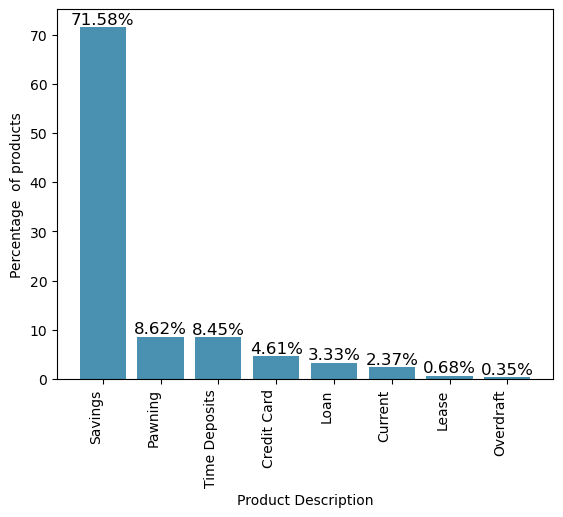

In [39]:
bars = plt.bar(product_percentage.index, product_percentage.values,color='#4990b1')
plt.xlabel('Product Description')
plt.ylabel('Percentage  of products')
plt.xticks(rotation=90, ha='right')

for bar, label in zip(bars, product_percentage.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.2f}%', 
             ha='center', va='bottom',fontsize=12)

plt.show()

In [40]:
df1 = df1[~df1['SUB_PRODUCT_DESC'].isin(['SAVINGS - MINOR', 'SAVINGS - MINOR - IBU', 'SAVINGS - MINOR - IBU - FC'])]

In [41]:
df1= df1[df1['CURRENCY_CD'] == 'LKR']

In [42]:
loan_df = df1[(df1['PRODUCT_DESC'] == 'Loan') & (df1['LNAMOUNT'] >0)]

In [43]:
loan_df.shape

(140430, 53)

In [44]:
loan_df['CURRENCY_CD'].value_counts()

LKR    140430
Name: CURRENCY_CD, dtype: int64

In [45]:
#  we need to cross sell loans for active customers in a bank 

In [46]:
loan_df.columns

Index(['CIFNO', 'ACCOUNT_STATUS', 'PRODUCT_DESC', 'SUB_PRODUCT_DESC', 'BAL_OS',
       'NET_INTEREST_INCOME', 'REGION_NAME', 'CURRENCY_CD', 'ACCOUNT_JOINT',
       'DPD_LAST_6_MONTH', 'NPA_FLAG', 'NO_ACCOUNTS_SAVINGS',
       'SIX_MONTH_BAL_OS_SAVINGS', 'NO_ACCOUNTS_CURRENT',
       'SIX_MONTH_BAL_OS_CURRENT', 'NO_ACCOUNTS_FD', 'SIX_MONTH_BAL_OS_FD',
       'NO_ACCOUNTS_HOUSING', 'SIX_MONTH_BAL_OS_HOUSING', 'NO_ACCOUNTS_TERM',
       'SIX_MONTH_BAL_OS_TERM', 'NO_ACCOUNTS_LEASING',
       'SIX_MONTH_BAL_OS_LEASING', 'NO_ACCOUNTS_PAWNING',
       'SIX_MONTH_BAL_OS_PAWNING', 'NO_ACCOUNTS_PERSONAL',
       'SIX_MONTH_BAL_OS_PERSONAL', 'NO_ACCOUNTS_SHORT_TERM',
       'SIX_MONTH_BAL_OS_SHORT_TERM', 'NO_ACCOUNTS_STAFF',
       'SIX_MONTH_BAL_OS_STAFF', 'NO_ACCOUNTS_TRADE', 'SIX_MONTH_BAL_OS_TRADE',
       'NO_ACCOUNTS_DEVELOPMENT', 'SIX_MONTH_BAL_OS_DEVELOPMENT',
       'NO_ACCOUNTS_REFINANCE', 'SIX_MONTH_BAL_OS_REFINANCE',
       'NO_ACCOUNTS_CARD', 'SIX_MONTH_BAL_OS_CARD', 'NO_ACCOUNTS_OD'

In [47]:
loan_df1=loan_df[['CIFNO', 'ACCOUNT_STATUS', 'PRODUCT_DESC', 'SUB_PRODUCT_DESC', 'BAL_OS',
       'NET_INTEREST_INCOME', 'REGION_NAME', 'ACCOUNT_JOINT',
       'DPD_LAST_6_MONTH']]

In [48]:
from scipy.stats import mode

In [49]:
lo_df = loan_df1.groupby(['CIFNO','PRODUCT_DESC'],as_index=False).aggregate({'SUB_PRODUCT_DESC':lambda x: mode(x)[0][0],'ACCOUNT_STATUS':lambda x: mode(x)[0][0],
                        'BAL_OS':'sum','NET_INTEREST_INCOME':'sum',"REGION_NAME":lambda x: mode(x)[0][0],'ACCOUNT_JOINT':lambda x: mode(x)[0][0],"DPD_LAST_6_MONTH":'max'})
lo_df2=lo_df.sort_values(by=['SUB_PRODUCT_DESC','ACCOUNT_STATUS','BAL_OS','NET_INTEREST_INCOME',"REGION_NAME",'ACCOUNT_JOINT',"DPD_LAST_6_MONTH"],ascending=False)
lo_df3=lo_df2.groupby('CIFNO').first().reset_index()
lo_df3.head()

C:\Users\15694\AppData\Local\Temp\ipykernel_4964\3747263550.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lo_df = loan_df1.groupby(['CIFNO','PRODUCT_DESC'],as_index=False).aggregate({'SUB_PRODUCT_DESC':lambda x: mode(x)[0][0],'ACCOUNT_STATUS':lambda x: mode(x)[0][0],
C:\Users\15694\AppData\Local\Temp\ipykernel_4964\3747263550.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  lo_df = loan_df1.groupby(['CIFNO','PRODUCT_DESC'

,CIFNO,PRODUCT_DESC,SUB_PRODUCT_DESC,ACCOUNT_STATUS,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,ACCOUNT_JOINT,DPD_LAST_6_MONTH
0,998000000102,Loan,PERSONAL LOANS,1,1781698.20,5555.40,Greater Colombo Region,0,0.0
1,998000000173,Loan,PERSONAL LOANS,1,1637529.58,1255.19,South Western Region,0,0.0
2,998000000219,Loan,TERM LOANS,1,3000000.00,54243.12,Colombo Region,0,0.0
3,998000000262,Loan,TERM LOANS,1,157280.00,1766.76,North Central Region,0,0.0
4,998000000312,Loan,TERM LOANS,1,43125.00,-676.02,Greater Colombo Region,0,0.0


In [50]:
unique_cifno_count_lo = lo_df3['CIFNO'].nunique()

if unique_cifno_count_lo == len(lo_df3):
    print("All CIFNO values are unique.")
else:
    print("There are duplicate CIFNO values.")

All CIFNO values are unique.


In [51]:
lo_df3.shape

(88505, 9)

In [52]:
loan_df2=loan_df[[
    "CIFNO",'NPA_FLAG', 'NO_ACCOUNTS_SAVINGS',
       'SIX_MONTH_BAL_OS_SAVINGS', 'NO_ACCOUNTS_CURRENT',
       'SIX_MONTH_BAL_OS_CURRENT', 'NO_ACCOUNTS_FD', 'SIX_MONTH_BAL_OS_FD',
       'NO_ACCOUNTS_HOUSING', 'SIX_MONTH_BAL_OS_HOUSING', 'NO_ACCOUNTS_TERM',
       'SIX_MONTH_BAL_OS_TERM', 'NO_ACCOUNTS_LEASING',
       'SIX_MONTH_BAL_OS_LEASING', 'NO_ACCOUNTS_PAWNING',
       'SIX_MONTH_BAL_OS_PAWNING', 'NO_ACCOUNTS_PERSONAL',
       'SIX_MONTH_BAL_OS_PERSONAL', 'NO_ACCOUNTS_SHORT_TERM',
       'SIX_MONTH_BAL_OS_SHORT_TERM', 'NO_ACCOUNTS_STAFF',
       'SIX_MONTH_BAL_OS_STAFF', 'NO_ACCOUNTS_TRADE', 'SIX_MONTH_BAL_OS_TRADE',
       'NO_ACCOUNTS_DEVELOPMENT', 'SIX_MONTH_BAL_OS_DEVELOPMENT',
       'NO_ACCOUNTS_REFINANCE', 'SIX_MONTH_BAL_OS_REFINANCE',
       'NO_ACCOUNTS_CARD', 'SIX_MONTH_BAL_OS_CARD', 'NO_ACCOUNTS_OD',
       'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL', 'FD_AMOUNT_UNDER_LIEN',
       'CURRENT_AMOUNT_UNDER_LIEN', 'SAVINGS_AMOUNT_UNDER_LIEN',
       'CUSTOMER_PROFITABILITY', 'E_BANKING_ACCOUNTS', 'SOLO_ACCOUNTS',
       'DEBIT_CARD_USAGE', 'CREDIT_CARD_USAGE', 'PAYFAST_ACCOUNT', 'NII',
       'LNAMOUNT']]

In [53]:
dlo=loan_df2.groupby('CIFNO').first().reset_index()

In [54]:
dlo.shape

(88505, 44)

In [55]:
final_loan_df=pd.merge(lo_df3, dlo, on='CIFNO', how='left')

In [56]:
final_loan_df.rename(columns={'DPD_LAST_6_MONTH': 'DPD_LAST_6_MONTH_LOAN'}, inplace=True)

In [57]:
final_loan_df['LNAMOUNT'].value_counts()

5.000000e+05    6980
1.000000e+06    4443
3.000000e+05    3810
3.750000e+05    2873
2.000000e+06    2871
1.500000e+06    2608
2.000000e+05    2480
6.000000e+05    2049
3.000000e+06    1900
4.000000e+05    1833
2.500000e+06    1673
5.000000e+06    1536
8.000000e+05    1275
7.000000e+05    1224
1.200000e+06    1142
4.000000e+06    1119
2.500000e+05    1047
1.000000e+05    1001
9.000000e+05     884
3.500000e+06     847
1.800000e+06     745
3.500000e+05     700
1.000000e+07     698
1.500000e+05     681
4.500000e+05     653
6.000000e+06     634
1.300000e+06     609
7.500000e+05     544
4.500000e+06     527
1.700000e+06     503
1.400000e+06     485
2.200000e+06     482
1.600000e+06     460
5.000000e+04     458
1.100000e+06     456
6.500000e+05     437
7.000000e+06     427
8.000000e+06     346
2.300000e+06     335
7.500000e+06     330
2.800000e+06     325
2.700000e+06     322
2.100000e+06     318
2.400000e+06     274
1.900000e+06     267
5.500000e+05     265
1.500000e+07     264
1.350000e+06 

In [58]:
final_loan_df.shape

(88505, 52)

In [59]:
final_loan_df.head(10)

,CIFNO,PRODUCT_DESC,SUB_PRODUCT_DESC,ACCOUNT_STATUS,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,ACCOUNT_JOINT,DPD_LAST_6_MONTH_LOAN,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT
0,998000000102,Loan,PERSONAL LOANS,1,1.781698e+06,5555.40,Greater Colombo Region,0,0.0,0,4.0,699504.75,0.0,0.00,3.0,378962.46,0.0,0.00,1.0,41495.97,0.0,0.0,0.0,0.0,2.0,2005943.17,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20623.80,0.0,0.00,3.146530e+06,0.0,0.0,0.00,13770.79,1,1,200131.0,61300.72,0,12645.79,4.480000e+06
1,998000000173,Loan,PERSONAL LOANS,1,1.637530e+06,1255.19,South Western Region,0,0.0,0,3.0,53083.62,0.0,0.00,1.0,2838709.68,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1751763.01,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4.643556e+06,0.0,0.0,0.00,1560.99,1,0,0.0,0.00,0,1560.99,2.500000e+06
2,998000000219,Loan,TERM LOANS,1,3.000000e+06,54243.12,Colombo Region,0,0.0,0,2.0,4540.64,0.0,0.00,1.0,4000000.00,0.0,2519.41,1.0,3258136.42,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,7.265196e+06,0.0,0.0,0.00,5307.59,0,0,0.0,0.00,0,5157.59,3.600000e+06
3,998000000262,Loan,TERM LOANS,1,1.572800e+05,1766.76,North Central Region,0,0.0,0,3.0,125762.58,0.0,0.00,4.0,2130590.11,0.0,0.00,1.0,180316.12,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,227326.09,1.0,126526.97,2.790522e+06,0.0,0.0,0.00,8324.88,0,0,96000.0,0.00,0,7884.88,4.750000e+05
4,998000000312,Loan,TERM LOANS,1,4.312500e+04,-676.02,Greater Colombo Region,0,0.0,0,1.0,79470.60,0.0,0.00,0.0,0.00,0.0,0.00,1.0,52481.12,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.319517e+05,0.0,0.0,0.00,231.41,0,0,0.0,0.00,0,231.41,6.900000e+04
5,998000000347,Loan,HOME LOANS,1,2.386813e+06,-8796.74,South Western Region,0,0.0,0,10.0,685460.32,1.0,0.00,4.0,1551585.93,5.0,2436564.48,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,697875.28,5.371486e+06,0.0,0.0,9128.63,2837.15,1,1,20000.0,0.00,0,2722.15,3.803882e+06
6,998000000352,Loan,STAFF LOANS,1,1.160000e+07,-146913.84,Other,0,0.0,0,3.0,817143.17,1.0,0.00,5.0,20498550.21,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.0,11600000.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,59985.57,0.0,0.00,3.297568e+07,0.0,0.0,0.00,-123651.75,1,1,100000.0,150799.00,0,-123746.75,1.160000e+07
7,998000000406,Loan,STAFF LOANS,1,6.828820e+06,-42192.04,Colombo Region,0,0.0,0,6.0,400062.13,0.0,0.00,3.0,1275692.73,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4.0,6167264.73,0.0,0.0,0.0,0.0,0.0,0.0,2.0,372920.01,0.0,0.00,8.215940e+06,0.0,0.0,0.00,-36114.64,1,1,67460.0,0.00,0,-36204.64,8.625000e+06
8,998000000421,Loan,SHORT TERM LOANS,0,1.000000e+08,126955.17,Colombo Region,0,0.0,0,0.0,0.00,2.0,822300.24,0.0,0.00,0.0,0.00,0.0,3473204.30,0.0,0.0,0.0,0.0,0.0,0.00,2.0,97625548.41,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-3314199.82,9.860685e+07,0.0,0.0,0.00,384060.63,1,0,0.0,0.00,0,377360.63,1.000000e+08
9,998000000719,Loan,TERM LOANS,1,7.000000e+07,661943.69,Colombo Region,0,0.0,0,1.0,2993050.72,0.0,0.00,1.0,50000000.00,0.0,0.00,1.0,76842584.40,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.

In [60]:
unique_cifno_count = final_loan_df['CIFNO'].nunique()

if unique_cifno_count == len(final_loan_df):
    print("All CIFNO values are unique.")
else:
    print("There are duplicate CIFNO values.")

All CIFNO values are unique.


In [61]:
final_loan_df['ACCOUNT_STATUS'].value_counts()

1    75239
0    13266
Name: ACCOUNT_STATUS, dtype: int64

In [62]:
final_loan_df['ACCOUNT_STATUS'].value_counts()

1    75239
0    13266
Name: ACCOUNT_STATUS, dtype: int64

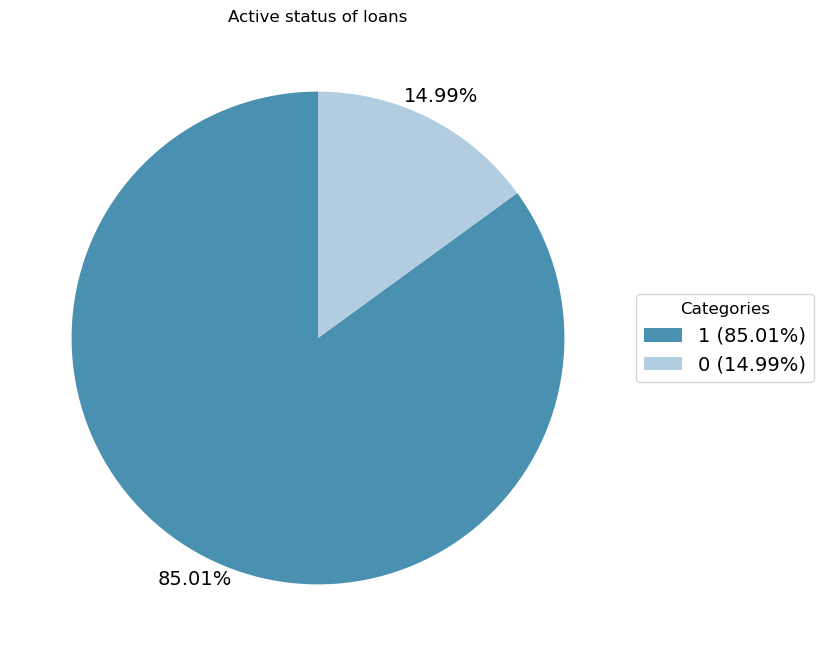

In [63]:
category_counts = final_loan_df['ACCOUNT_STATUS'].value_counts()
custom_color = '#4990b1', '#b3cde0'

plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(category_counts, labels=None, autopct='%1.2f%%', colors=custom_color, startangle=90, 
                          textprops={'fontsize': 14},pctdistance=1.1,labeldistance=1.2)  


legend_labels = [f'{label} ({percentage:.2f}%)' for label, percentage in zip(category_counts.index, 

                                                                             category_counts / sum(category_counts) * 100)]
plt.legend(labels=legend_labels, bbox_to_anchor=(1, 0.5), loc="center left", 
           fontsize=14, title='Categories', title_fontsize=12)
plt.title('Active status of loans', fontsize=12)
plt.show()

In [64]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df_loan = pd.read_csv("C://Users//15694//Desktop//Cross selling//code//Michelle//loan_desc_F.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

C:\Users\15694\AppData\Local\Temp\ipykernel_4964\3948250372.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("C://Users//15694//Desktop//Cross selling//code//Michelle//loan_desc_F.csv", encoding=encoding)


In [65]:
df_loan.shape

(28545, 50)

In [66]:
df_loan.isna().sum()

CIFNO                           0
PRODUCT_DESC                    0
SUB_PRODUCT_DESC                0
BAL_OS                          0
NET_INTEREST_INCOME             0
REGION_NAME                     0
DPD_LAST_6_MONTH_LOAN           0
NPA_FLAG                        0
NO_ACCOUNTS_SAVINGS             0
SIX_MONTH_BAL_OS_SAVINGS        0
NO_ACCOUNTS_CURRENT             0
SIX_MONTH_BAL_OS_CURRENT        0
NO_ACCOUNTS_FD                  0
SIX_MONTH_BAL_OS_FD             0
NO_ACCOUNTS_HOUSING             0
SIX_MONTH_BAL_OS_HOUSING        0
NO_ACCOUNTS_TERM                0
SIX_MONTH_BAL_OS_TERM           0
NO_ACCOUNTS_LEASING             0
SIX_MONTH_BAL_OS_LEASING        0
NO_ACCOUNTS_PAWNING             0
SIX_MONTH_BAL_OS_PAWNING        0
NO_ACCOUNTS_PERSONAL            0
SIX_MONTH_BAL_OS_PERSONAL       0
NO_ACCOUNTS_SHORT_TERM          0
SIX_MONTH_BAL_OS_SHORT_TERM     0
NO_ACCOUNTS_STAFF               0
SIX_MONTH_BAL_OS_STAFF          0
NO_ACCOUNTS_TRADE               0
SIX_MONTH_BAL_

In [67]:
df_loan.head()

,CIFNO,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,DPD_LAST_6_MONTH_LOAN,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT
0,998000000102,Loan,PERSONAL LOANS,1781698.20,5555.40,Greater Colombo Region,0.0,0,4.0,699504.75,0.0,0.0,3.0,378962.46,0.0,0.00,1.0,41495.97,0.0,0.00,0.0,0.0,2.0,2005943.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20623.80,0.0,0.00,3146530.15,0.0,0.0,0.0,13770.79,1,1,200131.00,61300.72,0,12645.79,4480000.0
1,998000000173,Loan,PERSONAL LOANS,1637529.58,1255.19,South Western Region,0.0,0,3.0,53083.62,0.0,0.0,1.0,2838709.68,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1751763.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4643556.31,0.0,0.0,0.0,1560.99,1,0,0.00,0.00,0,1560.99,2500000.0
2,998000000219,Loan,TERM LOANS,3000000.00,54243.12,Colombo Region,0.0,0,2.0,4540.64,0.0,0.0,1.0,4000000.00,0.0,2519.41,1.0,3258136.42,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,7265196.47,0.0,0.0,0.0,5307.59,0,0,0.00,0.00,0,5157.59,5500000.0
3,998000000262,Loan,TERM LOANS,157280.00,1766.76,North Central Region,0.0,0,3.0,125762.58,0.0,0.0,4.0,2130590.11,0.0,0.00,1.0,180316.12,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,227326.09,1.0,126526.97,2790521.87,0.0,0.0,0.0,8324.88,0,0,96000.00,0.00,0,7884.88,90000.0
4,998000001009,Loan,TERM LOANS,13121500.00,62153.82,South Western Region,0.0,0,4.0,689788.75,0.0,0.0,3.0,819732.71,0.0,0.00,1.0,13739494.65,4.0,9661130.11,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,24910146.22,30000.0,0.0,0.0,87094.26,0,0,4170.29,0.00,0,80394.26,17500000.0


In [68]:
df_loan['NO_OF_LIABILITY_ACCOUNTS'] =df_loan['NO_ACCOUNTS_SAVINGS'] + df_loan['NO_ACCOUNTS_CURRENT'] + df_loan['NO_ACCOUNTS_FD']

In [69]:
df_loan['NO_OF_ASSET_ACCOUNTS'] = df_loan['NO_ACCOUNTS_CARD'] + df_loan['NO_ACCOUNTS_OD'] + df_loan['NO_ACCOUNTS_LEASING']

In [70]:
df_loan['SUB_PRODUCT_DESC'].value_counts()

PERSONAL LOANS       12916
DEVELOPMENT LOANS     8304
TERM LOANS            4248
HOME LOANS            2153
REFINANCE LOANS        689
SHORT TERM LOANS       207
Trade Facilities        28
Name: SUB_PRODUCT_DESC, dtype: int64

In [71]:
loan_percentage = df_loan['SUB_PRODUCT_DESC'].value_counts(normalize=True) * 100
loan_percentage

PERSONAL LOANS       45.247854
DEVELOPMENT LOANS    29.090909
TERM LOANS           14.881766
HOME LOANS            7.542477
REFINANCE LOANS       2.413733
SHORT TERM LOANS      0.725171
Trade Facilities      0.098091
Name: SUB_PRODUCT_DESC, dtype: float64

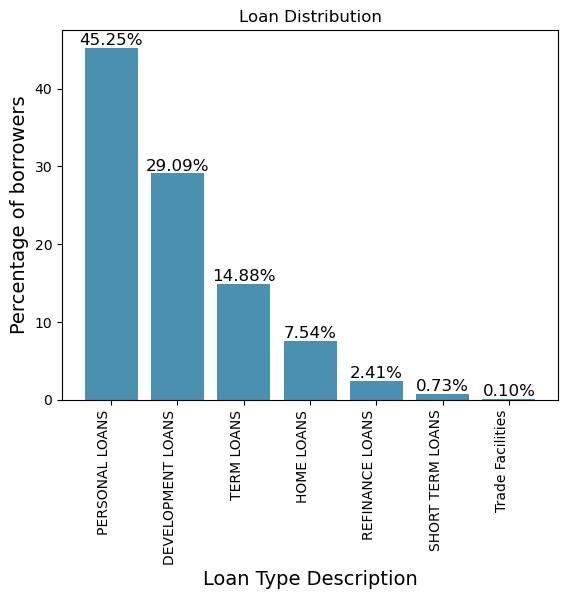

In [72]:

bars = plt.bar(loan_percentage.index, loan_percentage.values,color='#4990b1')
plt.xlabel('Loan Type Description',fontsize=14)
plt.ylabel('Percentage of borrowers',fontsize=14)
plt.title('Loan Distribution')
plt.xticks(rotation=90, ha='right')

for bar, label in zip(bars, loan_percentage.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.2f}%', 
             ha='center', va='bottom',fontsize=12)

plt.show()

In [73]:
df_loan['NET_INTEREST_INCOME'].value_counts()

 0.00           144
-1178.34         25
-1581.81         23
-194.05          22
-1170.92         19
-1448.11         19
-1170.88         19
-97.02           18
-145.54          18
-4748.30         18
-4566.11         18
-397.80          17
-1521.68         17
-3679.53         17
-5762.55         17
-3362.19         16
-1521.67         16
-1219.14         16
-1178.36         16
-2860.88         16
-696.13          16
-1170.91         16
-702.55          15
-4734.73         15
-832.76          15
-5858.03         15
-1583.74         15
-959.20          15
-868.91          14
-936.86          14
-1292.04         14
-3679.51         14
-698.69          14
-2840.88         14
-497.24          13
-1521.63         13
-1107.36         13
-546.96          13
-4748.26         12
-1716.52         12
-1599.02         11
-950.25          11
-1399.37         11
-869.13          11
-2051.52         11
-3362.24         11
-468.36          11
-2664.98         11
-1497.01         11
-2664.93         11


In [74]:
min_value = df_loan['NET_INTEREST_INCOME'].min()
max_value = df_loan['NET_INTEREST_INCOME'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: -1255011.37
Maximum value: 48666790.29


In [75]:
bins = [-150000000,-0.0000000000000000000000000000001,0.0000000000000000000000000000001, 5000, 10000, 50000, float('inf')]
labels = ['NII < 0',
          'NII = 0', 
          '0 < NII < 5000', 
          '5000 <= NII < 10000',
          '10000 <= NII < 50000', 
          'NII >= 50000']

# Create the new categorical variable
df_loan['NET_INTEREST_INCOME_CAT'] = pd.cut(df_loan['NET_INTEREST_INCOME'], bins=bins, labels=labels, right=False)

In [76]:
df_loan['NET_INTEREST_INCOME_CAT'].value_counts()

0 < NII < 5000          14695
NII < 0                  8391
5000 <= NII < 10000      2541
10000 <= NII < 50000     2161
NII >= 50000              613
NII = 0                   144
Name: NET_INTEREST_INCOME_CAT, dtype: int64

C:\Users\15694\AppData\Local\Temp\ipykernel_4964\2762664406.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels_order, rotation=90, fontsize=12)  # Use set_xticklabels for rotation


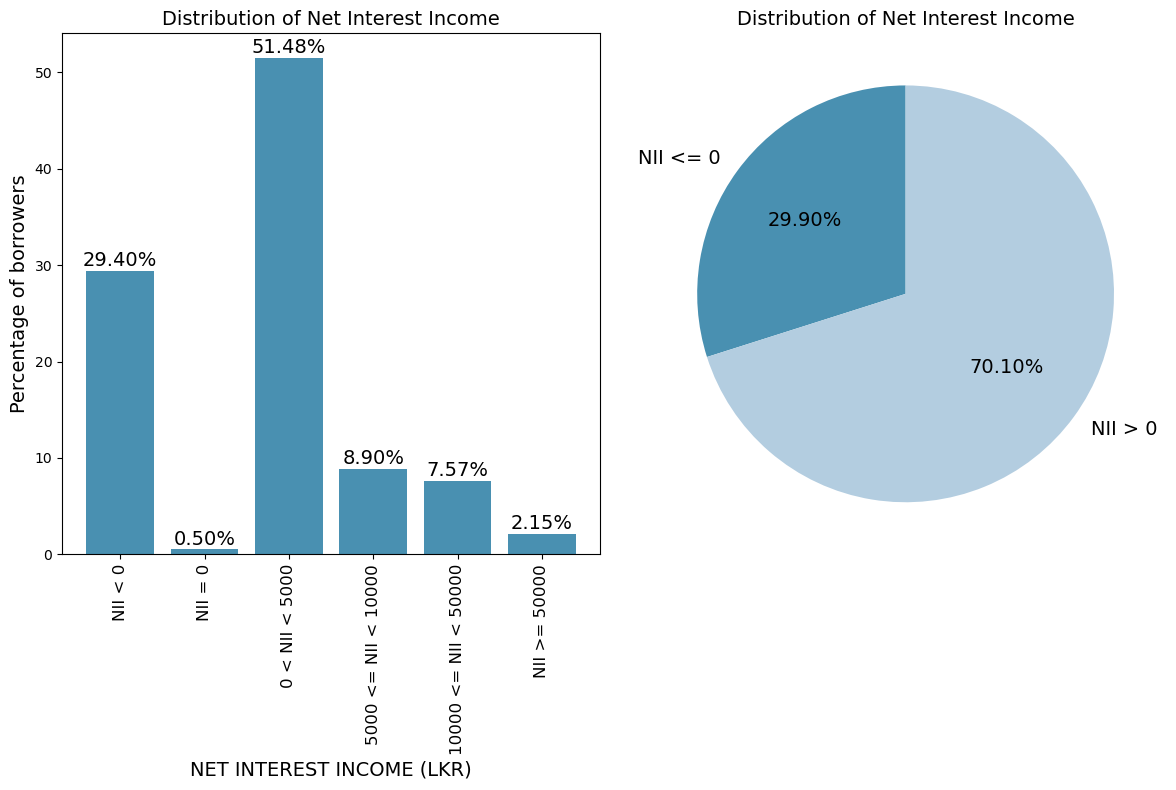

In [77]:
category_counts = df_loan['NET_INTEREST_INCOME_CAT'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100
custom_color = '#4990b1'
labels_order = ['NII < 0', 'NII = 0', '0 < NII < 5000', '5000 <= NII < 10000', '10000 <= NII < 50000', 'NII >= 50000']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Bar plot
bars = ax1.bar(labels_order, category_percentages[labels_order], color=custom_color)
for bar, percentage in zip(bars, category_percentages[labels_order]):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=14, color='black')
ax1.set_title('Distribution of Net Interest Income', fontsize=14)
ax1.set_xlabel('NET INTEREST INCOME (LKR)',fontsize=14)
ax1.set_xticklabels(labels_order, rotation=90, fontsize=12)  # Use set_xticklabels for rotation
ax1.set_ylabel('Percentage of borrowers',fontsize=14)

# Pie chart
nii_labels = ['NII <= 0', 'NII > 0']
nii_counts = [category_counts['NII < 0'] + category_counts['NII = 0'], category_counts['0 < NII < 5000'] + category_counts['5000 <= NII < 10000'] + category_counts['10000 <= NII < 50000'] + category_counts['NII >= 50000']]
pie_colors = ['#4990b1', '#b3cde0']

ax2.pie(nii_counts, labels=nii_labels, autopct='%1.2f%%', colors=pie_colors, startangle=90,textprops={'fontsize': 14})
ax2.set_title('Distribution of Net Interest Income',fontsize=14)

plt.tight_layout()
plt.show()

In [78]:
df_loan['BAL_OS'].value_counts()

5.000000e+05    1223
3.000000e+05     772
3.750000e+05     387
0.000000e+00     365
4.000000e+05     272
1.000000e+06     260
2.000000e+05     178
6.000000e+05     127
3.500000e+05     109
6.500000e+05     101
2.500000e+05      89
1.500000e+05      78
7.000000e+05      65
2.800000e+05      62
8.000000e+05      58
4.500000e+05      53
1.000000e+05      53
7.500000e+05      47
2.000000e+06      32
1.500000e+06      25
1.250000e+05      22
5.500000e+05      21
2.640000e+04      21
5.000000e+04      20
9.000000e+05      18
8.000000e+04      18
1.875000e+05      17
2.500000e+04      16
7.600000e+03      16
9.000000e+04      16
2.690000e+05      15
6.750000e+05      14
2.900000e+05      14
3.000000e+06      13
2.060000e+05      11
8.500000e+05      11
1.640000e+05      11
6.000000e+04      11
1.664000e+05      11
2.200000e+05      11
7.500000e+04      10
8.750000e+05      10
9.850104e+04      10
2.250000e+05      10
3.600000e+05      10
2.480000e+05      10
5.250000e+05      10
1.115000e+05 

In [79]:
min_value = df_loan['BAL_OS'].min()
max_value = df_loan['BAL_OS'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 8191201110.309999


In [80]:
bin_edges = [0,0.000001, 100001,500001,1000001, float('inf')]
bin_labels = ['BAL_OS= 0', '0< BAL_OS <= 1 Lakh','1 Lakh < BAL_OS<= 5 Lakh', '5 Lakh < BAL_OS <= 1 Million','BAL_OS > 1 Million']

# Create a new categorical variable 'DPD_CATEGORY'
df_loan['BAL_OS_cat'] = pd.cut(df_loan['BAL_OS'], bins=bin_edges, labels=bin_labels, right=False)

In [81]:
df_loan['BAL_OS_cat'].value_counts()

BAL_OS > 1 Million              11203
1 Lakh < BAL_OS<= 5 Lakh         9500
5 Lakh < BAL_OS <= 1 Million     5080
0< BAL_OS <= 1 Lakh              2397
BAL_OS= 0                         365
Name: BAL_OS_cat, dtype: int64

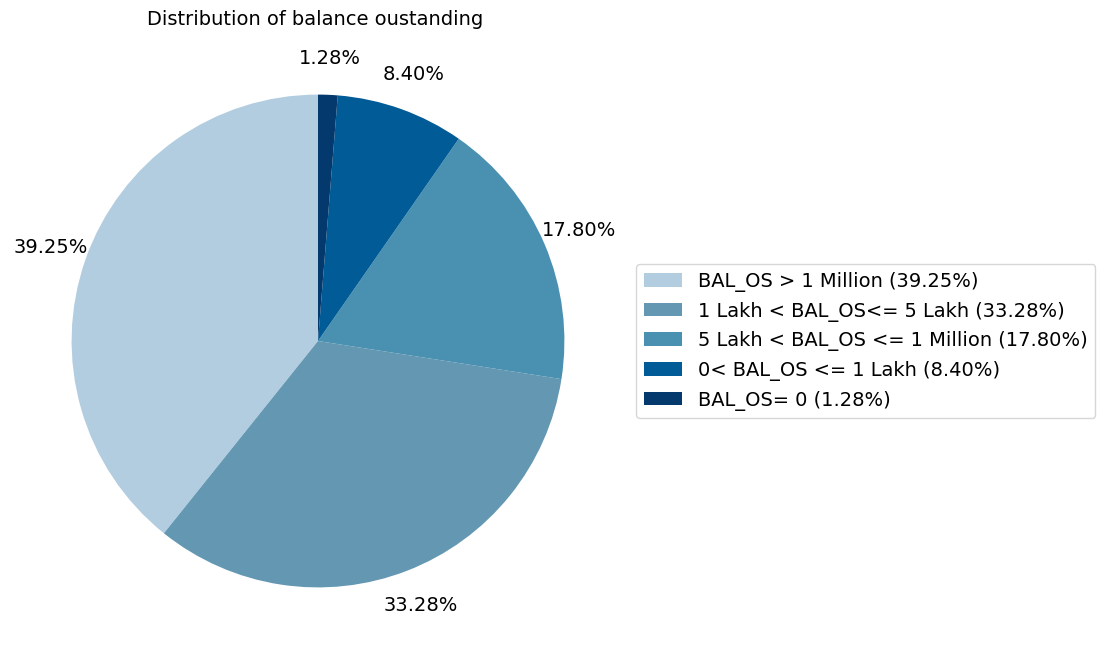

In [82]:
category_counts = df_loan['BAL_OS_cat'].value_counts()


custom_colors = ['#b3cde0', '#6497b1','#4990b1', '#005b96', '#03396c', ]



plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(category_counts, labels=None, autopct='%1.2f%%', colors=custom_colors, startangle=90, 
                          textprops={'fontsize': 14},pctdistance=1.15,labeldistance=1.2)  


legend_labels = [f'{label} ({percentage:.2f}%)' for label, percentage in zip(category_counts.index, 

                                                                             category_counts / sum(category_counts) * 100)]
plt.legend(labels=legend_labels, bbox_to_anchor=(1, 0.5), loc="center left", 
           fontsize=14,  title_fontsize=12)
plt.title('Distribution of balance oustanding ', fontsize=14)
plt.show()


In [83]:
df_loan['DPD_LAST_6_MONTH_LOAN'].value_counts()

0.0       23654
4.0         549
7.0         459
2.0         222
17.0        160
37.0        149
6.0         145
12.0        134
3.0         134
34.0        126
5.0         125
8.0         125
22.0        115
32.0        103
27.0         94
9.0          92
10.0         84
13.0         70
11.0         70
1.0          67
14.0         64
20.0         63
15.0         63
38.0         61
16.0         60
33.0         59
42.0         57
47.0         55
23.0         54
36.0         52
40.0         50
35.0         48
39.0         47
19.0         47
31.0         44
26.0         44
21.0         44
18.0         42
52.0         42
24.0         39
44.0         36
30.0         35
29.0         34
25.0         31
28.0         28
43.0         28
50.0         26
48.0         25
55.0         25
41.0         23
51.0         23
49.0         22
46.0         22
45.0         19
53.0         18
65.0         17
57.0         17
54.0         12
56.0         12
68.0         10
63.0          9
462.0         9
69.0    

In [84]:
bin_edges = [0,0.1, 31, 91,  float('inf')]
bin_labels = ["DPD = Zero","0< DPD <=1 Month","1 Month < DPD <= 3 Months",
              "DPD > 3 Months"]


df_loan['DPD_CATEGORY1'] = pd.cut(df_loan['DPD_LAST_6_MONTH_LOAN'], bins=bin_edges, labels=bin_labels, right=False)

In [85]:
df_loan['DPD_CATEGORY1'].value_counts()

DPD = Zero                   23654
0< DPD <=1 Month              3293
1 Month < DPD <= 3 Months     1324
DPD > 3 Months                 274
Name: DPD_CATEGORY1, dtype: int64

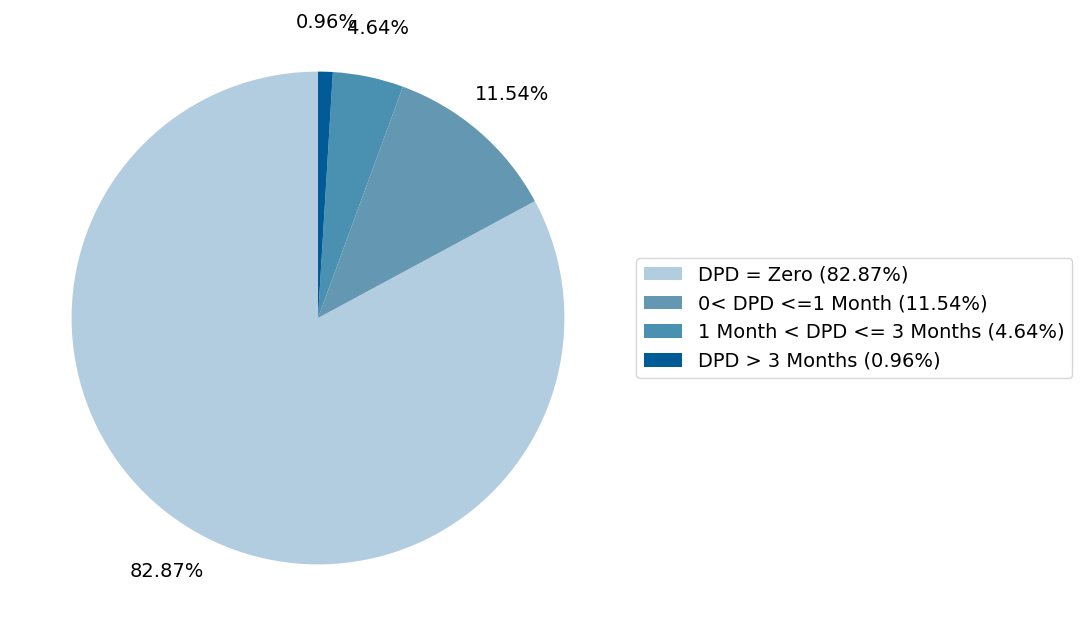

In [86]:
category_counts = df_loan['DPD_CATEGORY1'].value_counts()

# Define the colors
custom_colors = ['#b3cde0', '#6497b1','#4990b1', '#005b96']



plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(category_counts, labels=None, autopct='%1.2f%%', colors=custom_colors, startangle=90, 
                          textprops={'fontsize': 14},pctdistance=1.2,labeldistance=10)  


legend_labels = [f'{label} ({percentage:.2f}%)' for label, percentage in zip(category_counts.index, 

                                                                             category_counts / sum(category_counts) * 100)]
plt.legend(labels=legend_labels, bbox_to_anchor=(1, 0.5), loc="center left", 
           fontsize=14, title_fontsize=12)
#plt.title('Distribution of Days Past Due', fontsize=14)
plt.show()

In [87]:
df_loan['LNAMOUNT'].value_counts()

5.000000e+05    2464
3.000000e+05    1816
1.000000e+06    1578
2.000000e+06    1118
1.500000e+06     956
2.000000e+05     850
3.000000e+06     734
6.000000e+05     649
2.500000e+06     631
5.000000e+06     602
4.000000e+05     561
8.000000e+05     441
1.200000e+06     435
7.000000e+05     405
4.000000e+06     405
2.500000e+05     352
1.500000e+05     332
1.000000e+05     325
6.000000e+06     292
3.500000e+06     283
1.800000e+06     272
9.000000e+05     270
1.000000e+07     265
3.500000e+05     252
1.250000e+05     224
1.300000e+06     215
1.600000e+06     191
1.400000e+06     190
2.800000e+05     189
7.500000e+05     187
1.100000e+06     186
4.500000e+05     178
4.500000e+06     176
1.700000e+06     171
3.750000e+05     168
7.000000e+06     163
7.500000e+06     145
2.200000e+06     140
8.000000e+06     131
2.300000e+06     128
2.100000e+06     121
6.500000e+05     111
1.500000e+07     109
2.800000e+06     106
5.500000e+05     104
2.700000e+06     103
2.600000e+06      96
2.400000e+06 

In [88]:
min_value = df_loan['LNAMOUNT'].min()
max_value = df_loan['LNAMOUNT'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 1675.44
Maximum value: 4450000000.0


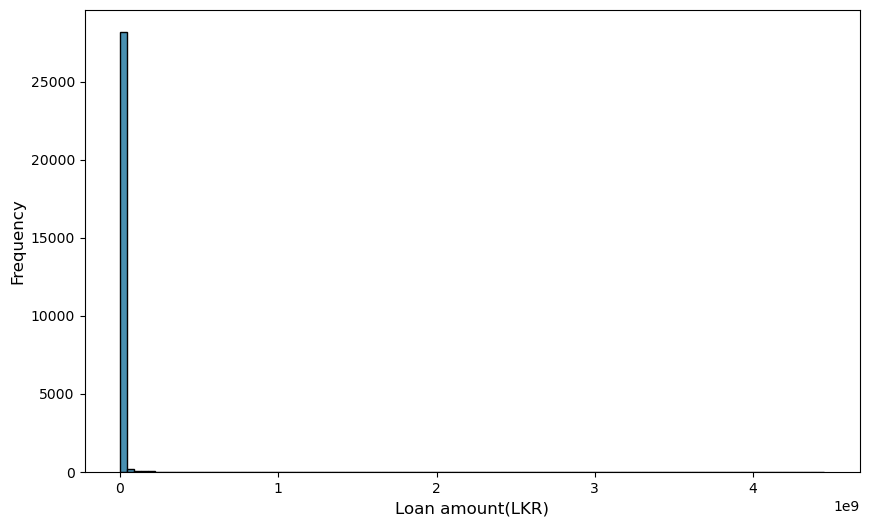

In [89]:
LNAMOUNT= df_loan['LNAMOUNT']


plt.figure(figsize=(10, 6))
plt.hist(LNAMOUNT, bins=100, color='#4990b1', edgecolor='black')


plt.xlabel('Loan amount(LKR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [90]:
filtered_data = [x for x in df_loan['LNAMOUNT'] if x <= 1 * 1e5]

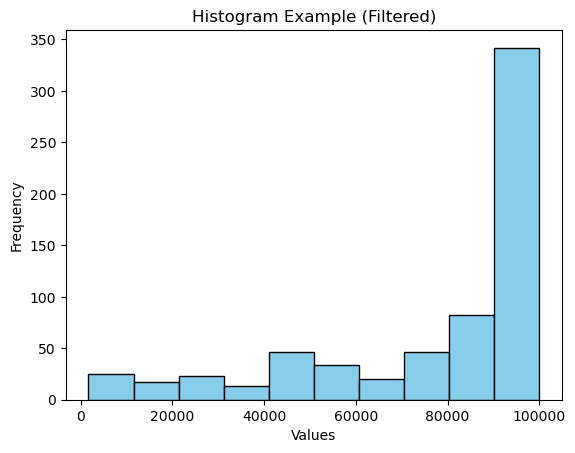

In [91]:
plt.hist(filtered_data, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example (Filtered)')

# Show plot
plt.show()

In [92]:
filtered_data1 = [x for x in df_loan['LNAMOUNT'] if 1 * 1e5 <= x <= 1 * 1e6]

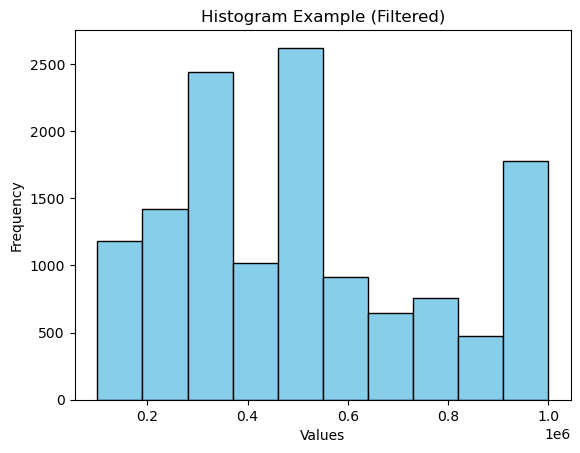

In [93]:
plt.hist(filtered_data1, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example (Filtered)')

# Show plot
plt.show()

In [94]:
filtered_data2 = [x for x in df_loan['LNAMOUNT'] if x <= 2 * 1e6]

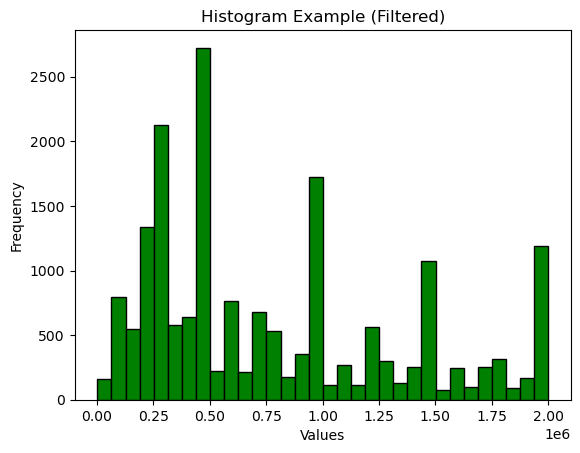

In [95]:
plt.hist(filtered_data2, bins=32, color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example (Filtered)')

# Show plot
plt.show()

In [96]:
filtered_data3 = [x for x in df_loan['LNAMOUNT'] if x <= 4 * 1e6]

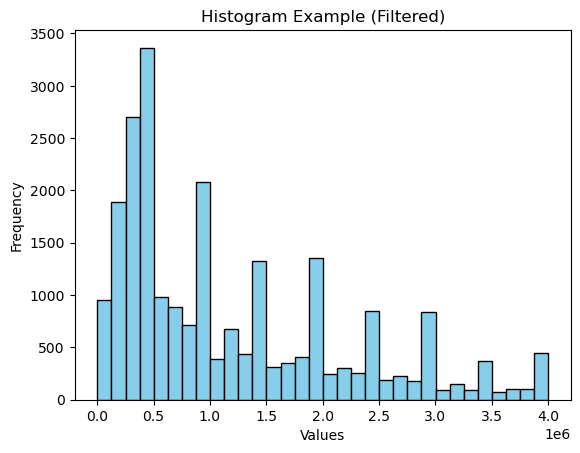

In [97]:
plt.hist(filtered_data3, bins=32, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example (Filtered)')

# Show plot
plt.show()

In [98]:
log_loan_amount =np.log(df_loan['LNAMOUNT'])

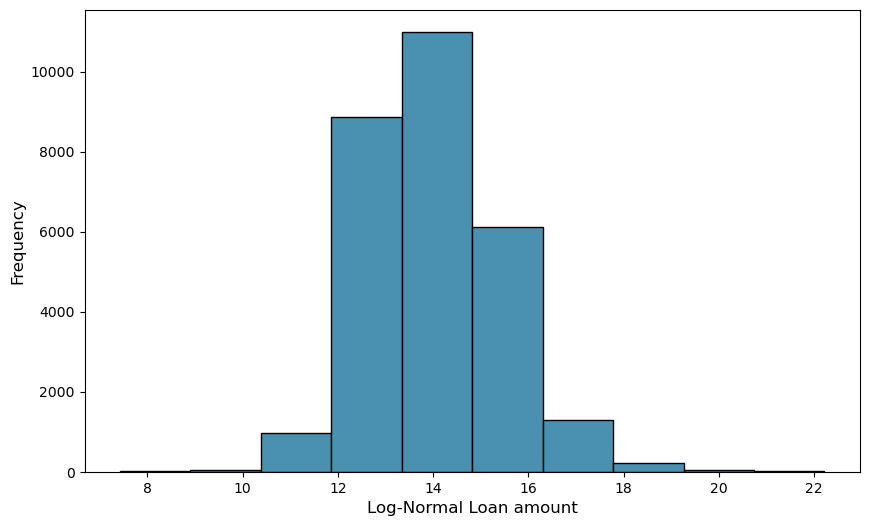

In [99]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(log_loan_amount , bins=10, color='#4990b1', edgecolor='black')

plt.xlabel('Log-Normal Loan amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [100]:
df_loan['LNAMOUNT'].value_counts()

5.000000e+05    2464
3.000000e+05    1816
1.000000e+06    1578
2.000000e+06    1118
1.500000e+06     956
2.000000e+05     850
3.000000e+06     734
6.000000e+05     649
2.500000e+06     631
5.000000e+06     602
4.000000e+05     561
8.000000e+05     441
1.200000e+06     435
7.000000e+05     405
4.000000e+06     405
2.500000e+05     352
1.500000e+05     332
1.000000e+05     325
6.000000e+06     292
3.500000e+06     283
1.800000e+06     272
9.000000e+05     270
1.000000e+07     265
3.500000e+05     252
1.250000e+05     224
1.300000e+06     215
1.600000e+06     191
1.400000e+06     190
2.800000e+05     189
7.500000e+05     187
1.100000e+06     186
4.500000e+05     178
4.500000e+06     176
1.700000e+06     171
3.750000e+05     168
7.000000e+06     163
7.500000e+06     145
2.200000e+06     140
8.000000e+06     131
2.300000e+06     128
2.100000e+06     121
6.500000e+05     111
1.500000e+07     109
2.800000e+06     106
5.500000e+05     104
2.700000e+06     103
2.600000e+06      96
2.400000e+06 

In [101]:
min_value = df_loan['LNAMOUNT'].min()
max_value = df_loan['LNAMOUNT'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 1675.44
Maximum value: 4450000000.0


In [102]:
bin_edges = [0,  100001, 500001,1000001,5000001,10000001, float('inf')]
bin_labels = [ "LNAMOUNT <=1 Lakh","1 Lakh < LNAMOUNT <= 5 Lakh",
              "5 Lakh < LNAMOUNT <= 1M","1M < LNAMOUNT <= 5M","5M < LNAMOUNT <= 10M",'LNAMOUNT > 10M']


df_loan['LOAN_CAT'] = pd.cut(df_loan['LNAMOUNT'], bins=bin_edges, labels=bin_labels, right=False)

In [103]:
df_loan['LOAN_CAT'].value_counts()

1M < LNAMOUNT <= 5M            11016
1 Lakh < LNAMOUNT <= 5 Lakh     8263
5 Lakh < LNAMOUNT <= 1M         4666
5M < LNAMOUNT <= 10M            2163
LNAMOUNT > 10M                  1789
LNAMOUNT <=1 Lakh                648
Name: LOAN_CAT, dtype: int64

C:\Users\15694\AppData\Local\Temp\ipykernel_4964\1823431845.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_order, rotation=90, fontsize=14)


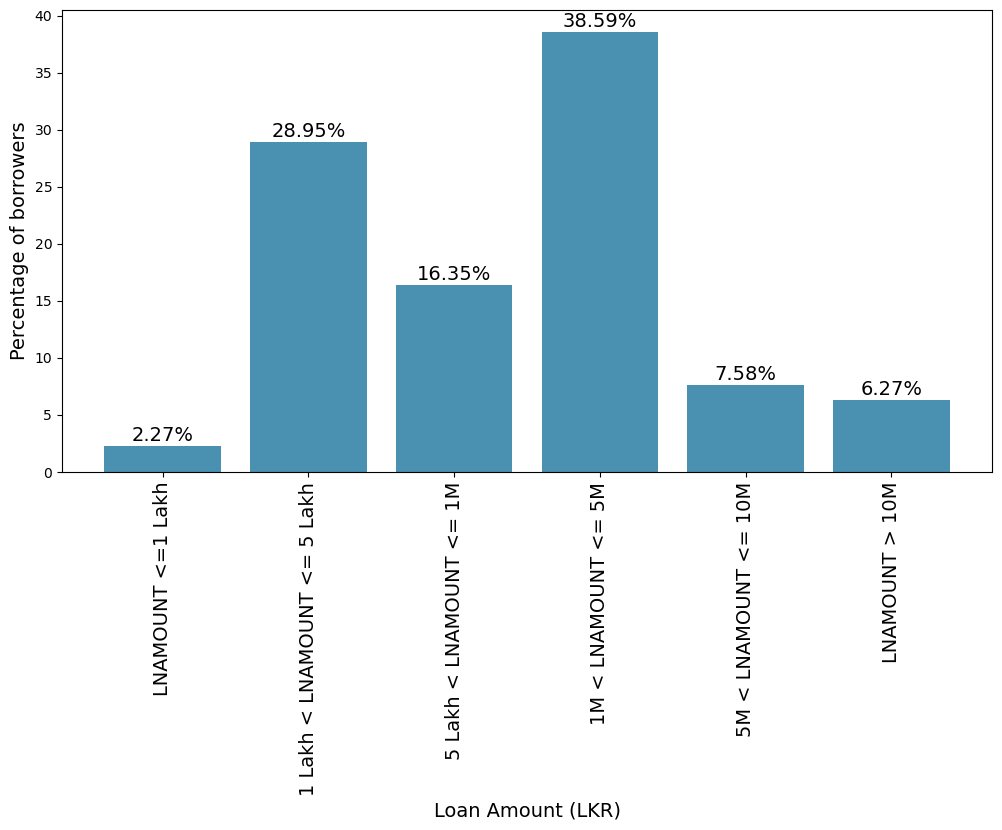

In [104]:
category_counts = df_loan['LOAN_CAT'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100
custom_color = '#4990b1'
labels_order = ["LNAMOUNT <=1 Lakh","1 Lakh < LNAMOUNT <= 5 Lakh",
              "5 Lakh < LNAMOUNT <= 1M","1M < LNAMOUNT <= 5M","5M < LNAMOUNT <= 10M",'LNAMOUNT > 10M']

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot
bars = ax.bar(labels_order, category_percentages[labels_order], color=custom_color)
for bar, percentage in zip(bars, category_percentages[labels_order]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=14, color='black')

ax.set_xlabel('Loan Amount (LKR)',fontsize=14)
ax.set_xticklabels(labels_order, rotation=90, fontsize=14) 
ax.set_ylabel('Percentage of borrowers',fontsize=14)

plt.show()

In [105]:
#b3cde0', '#8bafcf', '#6497b1', '#337b9e', '#005b96', '#024772', '#03396c', '#02233e', '#011f4b'

C:\Users\15694\AppData\Local\Temp\ipykernel_4964\3105945336.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


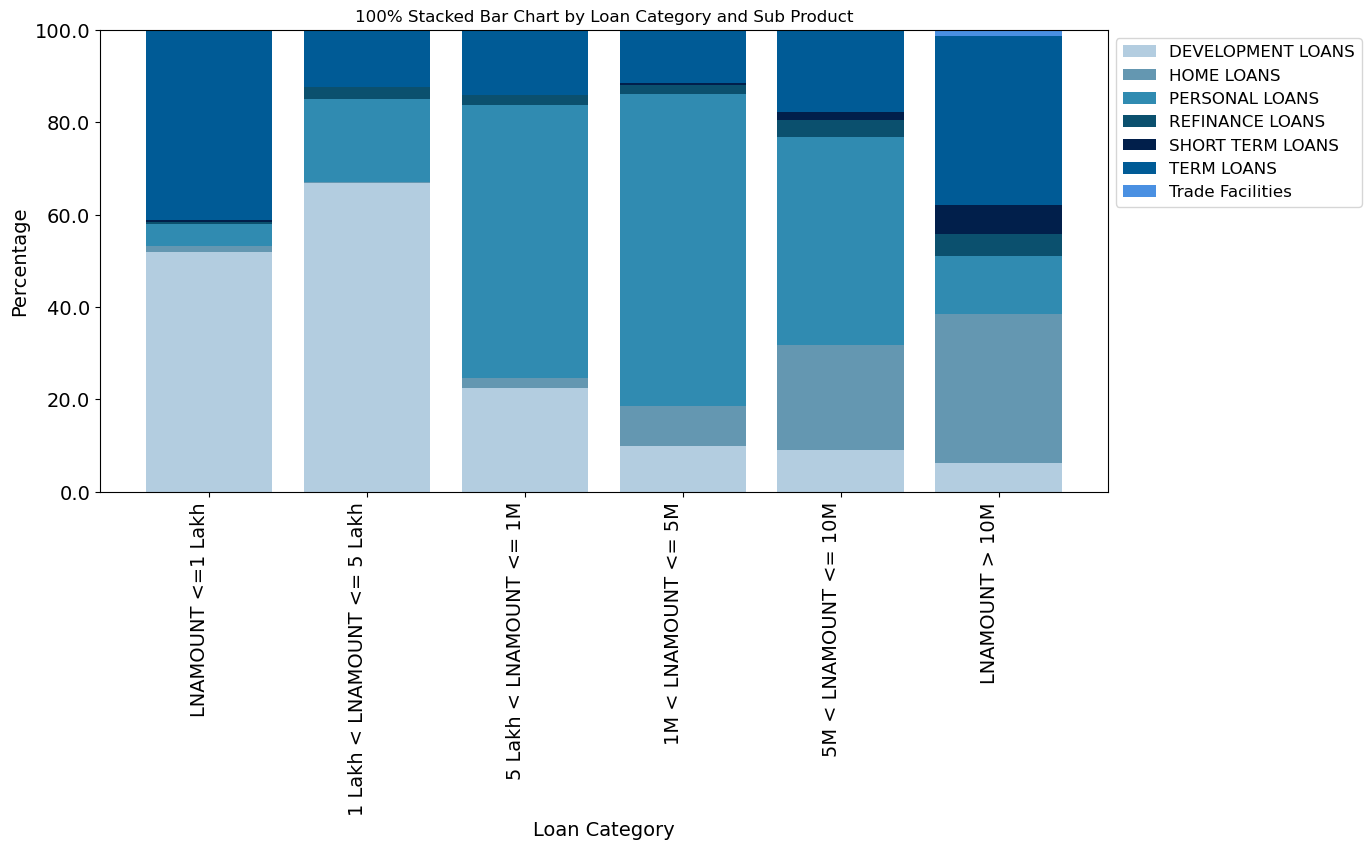

In [106]:
import seaborn as sns
# Assuming 'SUB_PRODUCT_DESC' is the categorical column you want to plot
fig, ax = plt.subplots(figsize=(13, 6))


color_palette = ['#b3cde0','#6497b1', '#308bb1',  '#0b506e', '#011f4b', '#005b96','#4a90e2']
labels_order = ["LNAMOUNT <=1 Lakh","1 Lakh < LNAMOUNT <= 5 Lakh",
              "5 Lakh < LNAMOUNT <= 1M","1M < LNAMOUNT <= 5M","5M < LNAMOUNT <= 10M",'LNAMOUNT > 10M']

# Normalize data to create a percentage stacked bar chart
df_normalized = df_loan.groupby(['LOAN_CAT', 'SUB_PRODUCT_DESC']).size().unstack().div(df_loan.groupby('LOAN_CAT').size(), axis=0) * 100

sns.barplot(x=df_normalized.index, y=df_normalized.sum(axis=1), color='white', ax=ax)

bottom = 0
for color, sub_product in zip(color_palette, df_normalized.columns):
    ax.bar(df_normalized.index, df_normalized[sub_product], bottom=bottom, label=sub_product, color=color)
    bottom += df_normalized[sub_product]

ax.set_title('100% Stacked Bar Chart by Loan Category and Sub Product', fontsize=12)
ax.set_xlabel('Loan Category',fontsize=14)
ax.set_ylabel('Percentage',fontsize=14)
ax.legend( bbox_to_anchor=(1, 1),fontsize=12)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right',fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)

plt.show()

In [107]:
df_normalized

SUB_PRODUCT_DESC,DEVELOPMENT LOANS,HOME LOANS,PERSONAL LOANS,REFINANCE LOANS,SHORT TERM LOANS,TERM LOANS,Trade Facilities
LOAN_CAT,,,,,,,
LNAMOUNT <=1 Lakh,51.851852,1.388889,4.629630,0.617284,0.308642,41.203704,0.000000
1 Lakh < LNAMOUNT <= 5 Lakh,66.840131,0.157328,17.983783,2.698778,0.036306,12.271572,0.012102
5 Lakh < LNAMOUNT <= 1M,22.396057,2.314616,59.044149,2.057437,0.171453,14.016288,0.000000
1M < LNAMOUNT <= 5M,9.921932,8.678286,67.574437,1.806463,0.408497,11.601307,0.009078
5M < LNAMOUNT <= 10M,9.015257,22.699954,45.122515,3.744799,1.710587,17.568192,0.138696
LNAMOUNT > 10M,6.260481,32.196758,12.576859,4.807155,6.260481,36.612633,1.285634


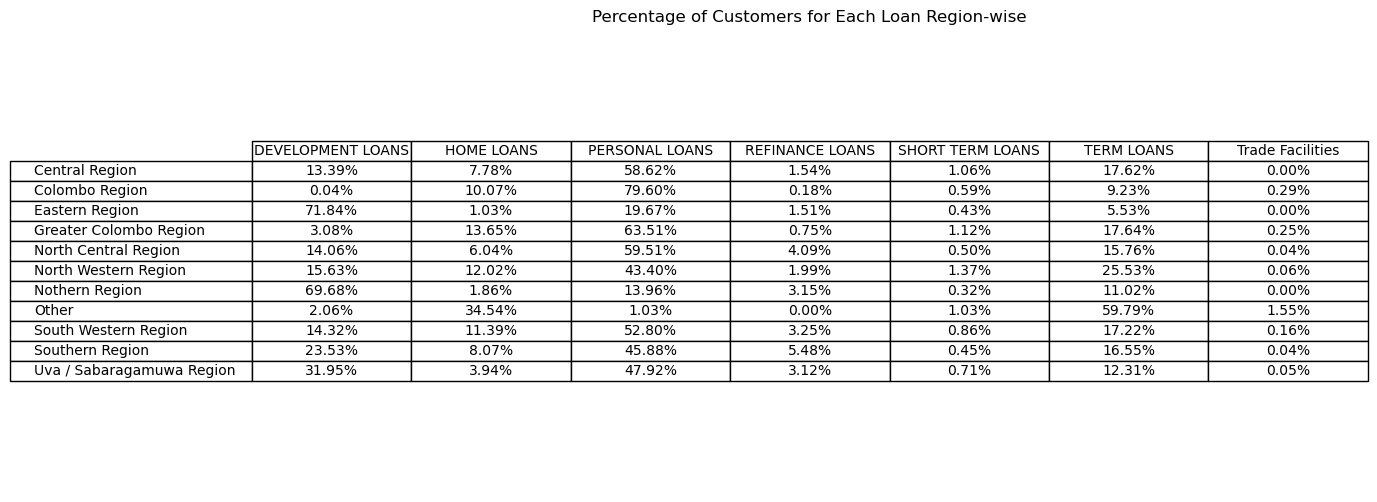

In [108]:
# Assuming df_loan is your DataFrame with 'REGION_NAME' and 'SUB_PRODUCT_DESC'
crosstab_result = pd.crosstab(df_loan['REGION_NAME'], df_loan['SUB_PRODUCT_DESC'], normalize='index') * 100

# Convert percentages to string format for display
crosstab_result = crosstab_result.applymap(lambda x: f'{x:.2f}%')

# Create a table
fig, ax = plt.subplots(figsize=(12, 6))
table = ax.table(cellText=crosstab_result.values, rowLabels=crosstab_result.index, colLabels=crosstab_result.columns, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

ax.axis('off')  # Turn off axis for better appearance

plt.title('Percentage of Customers for Each Loan Region-wise')
plt.show()

In [109]:
df_loan['CREDIT_CARD_USAGE'].value_counts()

0.00          24128
2020.00          18
1010.00          18
5050.00          17
1000.00          15
10000.00         10
3030.00          10
1500.00           9
2525.00           8
0.99              8
4000.00           8
4040.00           8
1515.00           8
5000.00           8
300.00            7
9.99              7
8080.00           6
10.00             6
6000.00           6
2500.00           6
10100.00          5
1400.00           5
6060.00           5
2000.00           5
4500.00           5
3000.00           5
100.00            5
200000.00         4
50.00             4
650.00            4
500.00            4
1450.00           4
1890.00           4
7070.00           4
7000.00           4
600.00            4
3200.00           4
3500.00           4
75.00             4
1490.00           4
6565.00           3
1300.00           3
3.99              3
8820.00           3
20200.00          3
900.00            3
2600.00           3
7500.00           3
1.99              3
13000.00          3


In [110]:
min_value = df_loan['CREDIT_CARD_USAGE'].min()
max_value = df_loan['CREDIT_CARD_USAGE'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 9141886.0


In [111]:
df_loan[df_loan['CREDIT_CARD_USAGE']==27767234.67]

,CIFNO,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,DPD_LAST_6_MONTH_LOAN,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT,NO_OF_LIABILITY_ACCOUNTS,NO_OF_ASSET_ACCOUNTS,NET_INTEREST_INCOME_CAT,BAL_OS_cat,DPD_CATEGORY1,LOAN_CAT


In [112]:
df_loan['DEBIT_CARD_USAGE'].value_counts()

0.000000e+00    16410
1.000000e+04      241
2.000000e+04      210
1.500000e+04      191
2.500000e+04      170
5.000000e+03      162
5.000000e+04      124
3.000000e+04      112
4.000000e+04      109
1.000000e+05      102
2.000000e+03       95
1.300000e+04       94
1.600000e+04       89
3.500000e+04       87
1.400000e+04       87
2.000000e+05       84
6.000000e+03       80
1.700000e+04       80
4.500000e+04       72
1.800000e+04       67
1.000000e+03       65
1.200000e+04       61
3.000000e+03       61
6.000000e+04       60
7.000000e+03       60
8.000000e+03       58
4.000000e+03       56
6.500000e+04       52
2.100000e+04       51
5.500000e+04       51
2.200000e+04       50
2.800000e+04       49
1.100000e+04       48
9.000000e+03       47
1.900000e+04       46
2.600000e+04       46
7.000000e+04       46
2.300000e+04       45
7.500000e+04       44
2.700000e+04       41
8.000000e+04       40
1.500000e+05       38
3.200000e+04       36
2.400000e+04       35
8.500000e+04       34
3.100000e+

In [113]:
df_loan['CreditCard_Usage_Category'] = df_loan['CREDIT_CARD_USAGE'].apply(lambda x: 'Y' if x > 0 else 'N')
df_loan['DebitCard_Usage_Category'] = df_loan['DEBIT_CARD_USAGE'].apply(lambda x: 'Y' if x > 0 else 'N')

df_credit_stacked = pd.crosstab(df_loan['LOAN_CAT'], df_loan['CREDIT_CARD_USAGE'] > 0, normalize='index') * 100

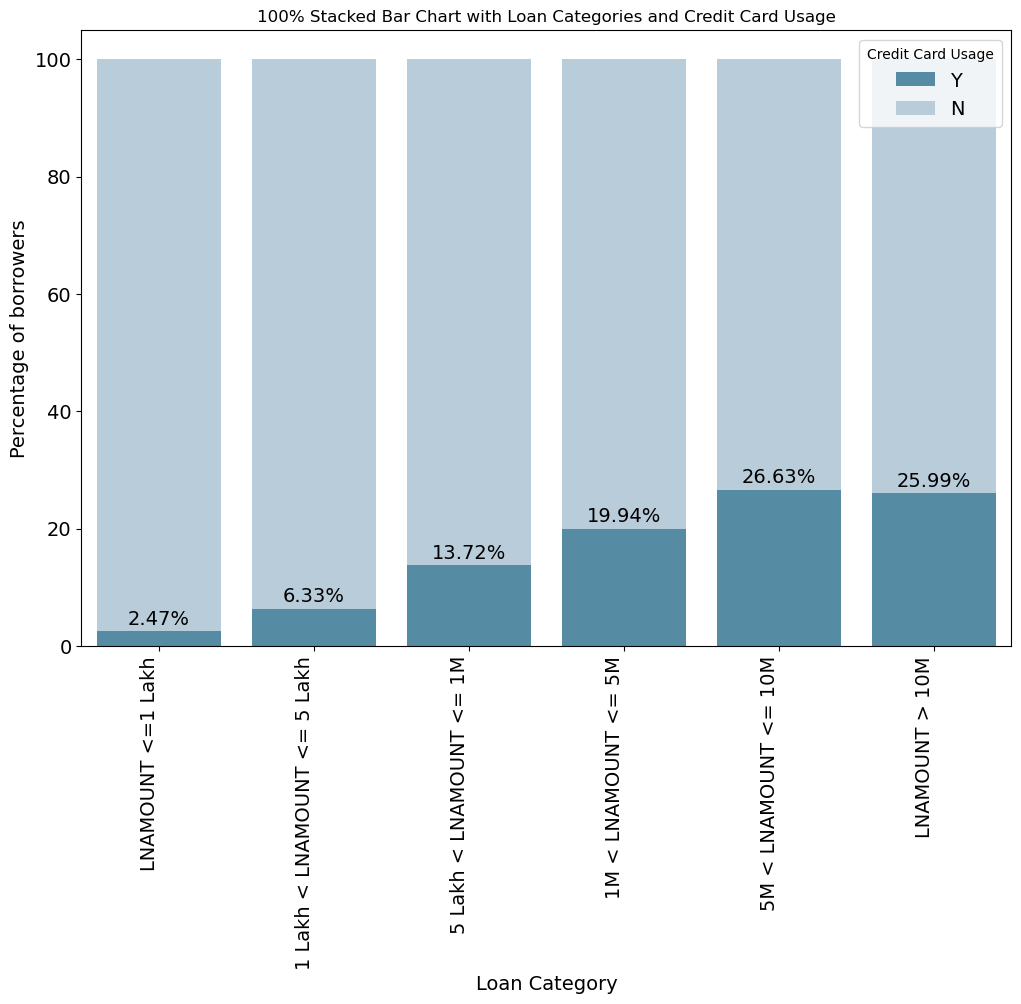

In [114]:
# Set the color palette
sns.set_palette(['#e5f0fa','#4990b1' ])

# Plotting 100% stacked bar chart for credit card usage
plt.figure(figsize=(12, 8))
credit_bars = sns.barplot(x=df_credit_stacked.index, y=df_credit_stacked[True], color='#4990b1', label='Y')
sns.barplot(x=df_credit_stacked.index, y=df_credit_stacked[False], color='#b3cde0', bottom=df_credit_stacked[True], label='N')

# Display percentage values on the bars
for bar, percentage in zip(credit_bars.patches, df_credit_stacked[True]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', 
             ha='center', va='bottom', fontsize=14, color='black')

plt.title('100% Stacked Bar Chart with Loan Categories and Credit Card Usage')
plt.xlabel('Loan Category',fontsize=14)
plt.ylabel('Percentage of borrowers',fontsize=14)
plt.legend(title='Credit Card Usage',fontsize=14)
plt.xticks(rotation=90, ha='right',fontsize=14)
plt.yticks(fontsize=14)

plt.show()

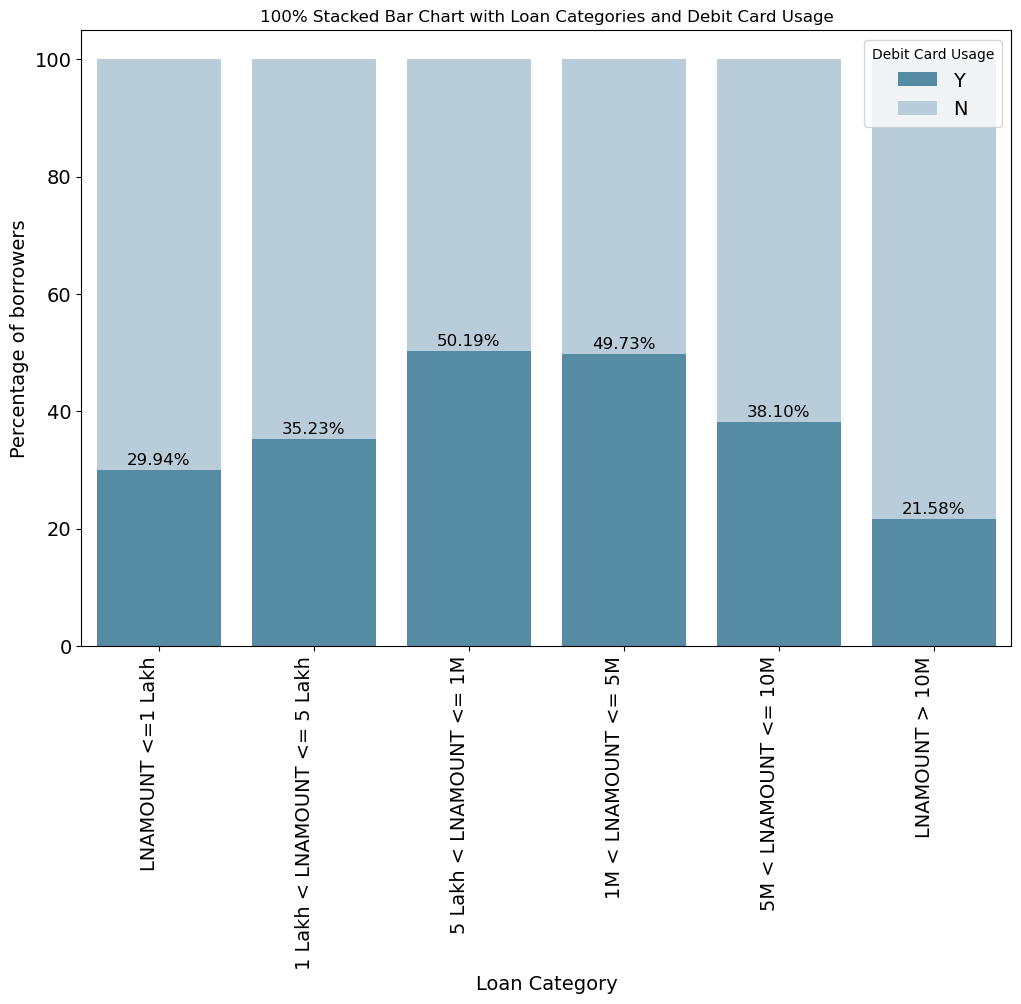

In [115]:
df_debit_stacked = pd.crosstab(df_loan['LOAN_CAT'], df_loan['DEBIT_CARD_USAGE'] > 0, normalize='index') * 100

# Set the color palette
sns.set_palette(['#e5f0fa','#4990b1'])

# Plotting 100% stacked bar chart for debit card usage
plt.figure(figsize=(12, 8))
debit_bars = sns.barplot(x=df_debit_stacked.index, y=df_debit_stacked[True], color='#4990b1', label='Y')
sns.barplot(x=df_debit_stacked.index, y=df_debit_stacked[False], color='#b3cde0', bottom=df_debit_stacked[True], label='N')

# Display percentage values on the bars
for bar, percentage in zip(debit_bars.patches, df_debit_stacked[True]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.title('100% Stacked Bar Chart with Loan Categories and Debit Card Usage')
plt.xlabel('Loan Category',fontsize=14)
plt.ylabel('Percentage of borrowers',fontsize=14)
plt.legend(title='Debit Card Usage',fontsize=14)
plt.xticks(rotation=90, ha='right',fontsize=14)
plt.yticks(fontsize=14)  
plt.show()

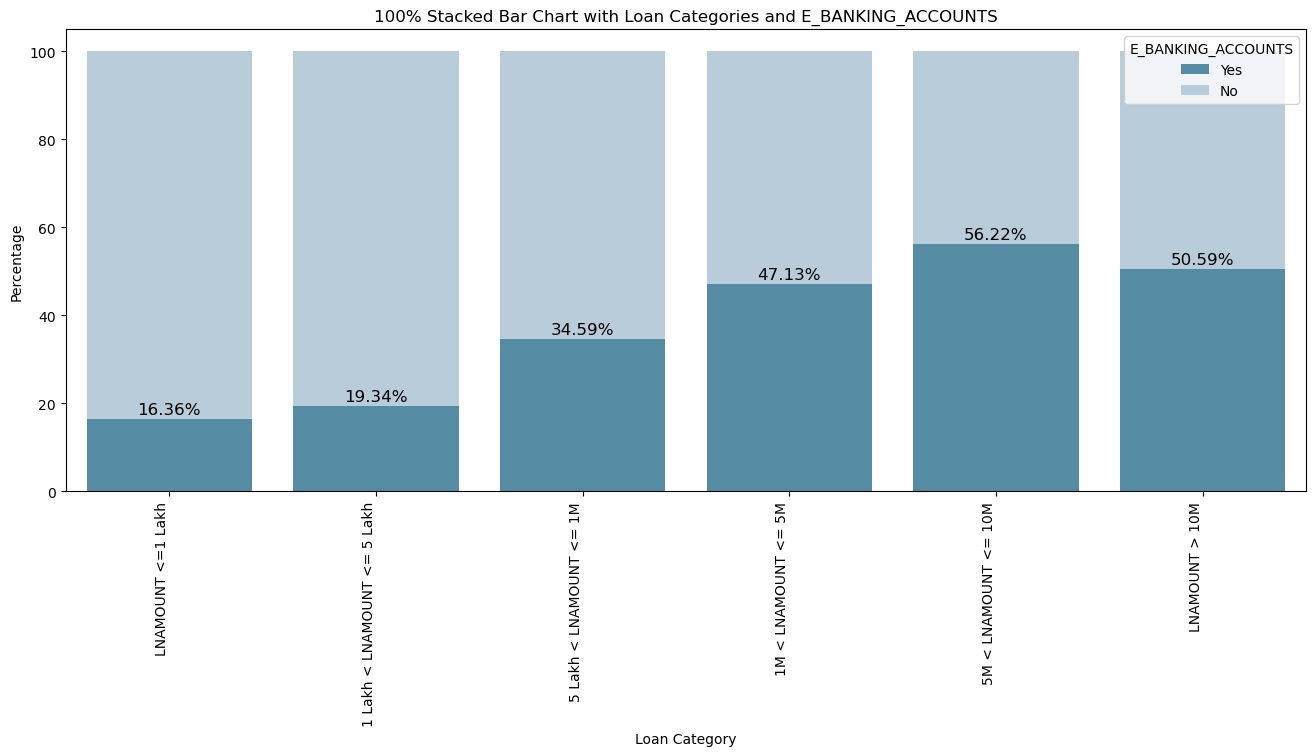

In [116]:
df_stacked = pd.crosstab(df_loan['LOAN_CAT'], df_loan['E_BANKING_ACCOUNTS'], normalize='index') * 100

sns.set_palette(['#4990b1', '#b3cde0'])
# Plotting 100% stacked bar chart
plt.figure(figsize=(16, 6))
bars = sns.barplot(x=df_stacked.index, y=df_stacked[1], color='#4990b1', label='Yes')
sns.barplot(x=df_stacked.index, y=df_stacked[0], color='#b3cde0', bottom=df_stacked[1], label='No')

# Display percentage values inside the bars
for bar, percentage in zip(bars.patches, df_stacked[1]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')


plt.title('100% Stacked Bar Chart with Loan Categories and E_BANKING_ACCOUNTS')
plt.xlabel('Loan Category')
plt.ylabel('Percentage')
plt.legend(title='E_BANKING_ACCOUNTS')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.show()

In [117]:
home_loans_counts = df_loan[df_loan['SUB_PRODUCT_DESC'] == 'HOME LOANS']['LNAMOUNT'].value_counts()

In [118]:
home_loans_counts 

5.000000e+06    105
3.000000e+06     92
2.000000e+06     78
1.000000e+07     61
6.000000e+06     60
1.000000e+06     58
4.000000e+06     54
7.000000e+06     50
1.500000e+06     44
2.500000e+06     43
8.000000e+06     41
1.500000e+07     40
3.500000e+06     37
2.000000e+07     27
9.000000e+06     27
4.500000e+06     27
7.500000e+06     25
1.200000e+07     23
3.000000e+07     23
1.200000e+06     21
1.400000e+07     19
2.500000e+07     16
1.100000e+07     14
1.250000e+07     13
1.800000e+07     13
1.300000e+07     13
8.500000e+06     13
1.600000e+06     12
2.400000e+06     12
6.500000e+06     12
1.800000e+06     11
2.700000e+06     11
1.100000e+06     10
1.600000e+07     10
5.500000e+06     10
1.400000e+06     10
2.200000e+07      9
1.350000e+07      9
1.700000e+07      8
4.200000e+06      8
2.200000e+06      8
1.700000e+06      8
4.000000e+07      7
3.500000e+07      7
3.200000e+06      7
2.100000e+06      7
4.800000e+06      7
1.300000e+06      7
1.050000e+07      6
6.300000e+06      6


In [119]:
customers_with_large_home_loan = df_loan[(df_loan['SUB_PRODUCT_DESC'] == 'HOME LOANS') & (df_loan['LNAMOUNT'] < 1000000)]
num_customers_large_home_loan = len(customers_with_large_home_loan)

In [120]:
df_loan.head()

,CIFNO,PRODUCT_DESC,SUB_PRODUCT_DESC,BAL_OS,NET_INTEREST_INCOME,REGION_NAME,DPD_LAST_6_MONTH_LOAN,NPA_FLAG,NO_ACCOUNTS_SAVINGS,SIX_MONTH_BAL_OS_SAVINGS,NO_ACCOUNTS_CURRENT,SIX_MONTH_BAL_OS_CURRENT,NO_ACCOUNTS_FD,SIX_MONTH_BAL_OS_FD,NO_ACCOUNTS_HOUSING,SIX_MONTH_BAL_OS_HOUSING,NO_ACCOUNTS_TERM,SIX_MONTH_BAL_OS_TERM,NO_ACCOUNTS_LEASING,SIX_MONTH_BAL_OS_LEASING,NO_ACCOUNTS_PAWNING,SIX_MONTH_BAL_OS_PAWNING,NO_ACCOUNTS_PERSONAL,SIX_MONTH_BAL_OS_PERSONAL,NO_ACCOUNTS_SHORT_TERM,SIX_MONTH_BAL_OS_SHORT_TERM,NO_ACCOUNTS_STAFF,SIX_MONTH_BAL_OS_STAFF,NO_ACCOUNTS_TRADE,SIX_MONTH_BAL_OS_TRADE,NO_ACCOUNTS_DEVELOPMENT,SIX_MONTH_BAL_OS_DEVELOPMENT,NO_ACCOUNTS_REFINANCE,SIX_MONTH_BAL_OS_REFINANCE,NO_ACCOUNTS_CARD,SIX_MONTH_BAL_OS_CARD,NO_ACCOUNTS_OD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,E_BANKING_ACCOUNTS,SOLO_ACCOUNTS,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,PAYFAST_ACCOUNT,NII,LNAMOUNT,NO_OF_LIABILITY_ACCOUNTS,NO_OF_ASSET_ACCOUNTS,NET_INTEREST_INCOME_CAT,BAL_OS_cat,DPD_CATEGORY1,LOAN_CAT,CreditCard_Usage_Category,DebitCard_Usage_Category
0,998000000102,Loan,PERSONAL LOANS,1781698.20,5555.40,Greater Colombo Region,0.0,0,4.0,699504.75,0.0,0.0,3.0,378962.46,0.0,0.00,1.0,41495.97,0.0,0.00,0.0,0.0,2.0,2005943.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20623.80,0.0,0.00,3146530.15,0.0,0.0,0.0,13770.79,1,1,200131.00,61300.72,0,12645.79,4480000.0,7.0,1.0,5000 <= NII < 10000,BAL_OS > 1 Million,DPD = Zero,1M < LNAMOUNT <= 5M,Y,Y
1,998000000173,Loan,PERSONAL LOANS,1637529.58,1255.19,South Western Region,0.0,0,3.0,53083.62,0.0,0.0,1.0,2838709.68,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1751763.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4643556.31,0.0,0.0,0.0,1560.99,1,0,0.00,0.00,0,1560.99,2500000.0,4.0,0.0,0 < NII < 5000,BAL_OS > 1 Million,DPD = Zero,1M < LNAMOUNT <= 5M,N,N
2,998000000219,Loan,TERM LOANS,3000000.00,54243.12,Colombo Region,0.0,0,2.0,4540.64,0.0,0.0,1.0,4000000.00,0.0,2519.41,1.0,3258136.42,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,7265196.47,0.0,0.0,0.0,5307.59,0,0,0.00,0.00,0,5157.59,5500000.0,3.0,0.0,NII >= 50000,BAL_OS > 1 Million,DPD = Zero,5M < LNAMOUNT <= 10M,N,N
3,998000000262,Loan,TERM LOANS,157280.00,1766.76,North Central Region,0.0,0,3.0,125762.58,0.0,0.0,4.0,2130590.11,0.0,0.00,1.0,180316.12,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,227326.09,1.0,126526.97,2790521.87,0.0,0.0,0.0,8324.88,0,0,96000.00,0.00,0,7884.88,90000.0,7.0,2.0,0 < NII < 5000,1 Lakh < BAL_OS<= 5 Lakh,DPD = Zero,LNAMOUNT <=1 Lakh,N,Y
4,998000001009,Loan,TERM LOANS,13121500.00,62153.82,South Western Region,0.0,0,4.0,689788.75,0.0,0.0,3.0,819732.71,0.0,0.00,1.0,13739494.65,4.0,9661130.11,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,24910146.22,30000.0,0.0,0.0,87094.26,0,0,4170.29,0.00,0,80394.26,17500000.0,7.0,4.0,NII >= 50000,BAL_OS > 1 Million,DPD = Zero,LNAMOUNT > 10M,N,Y


In [121]:
df_loan.shape

(28545, 58)

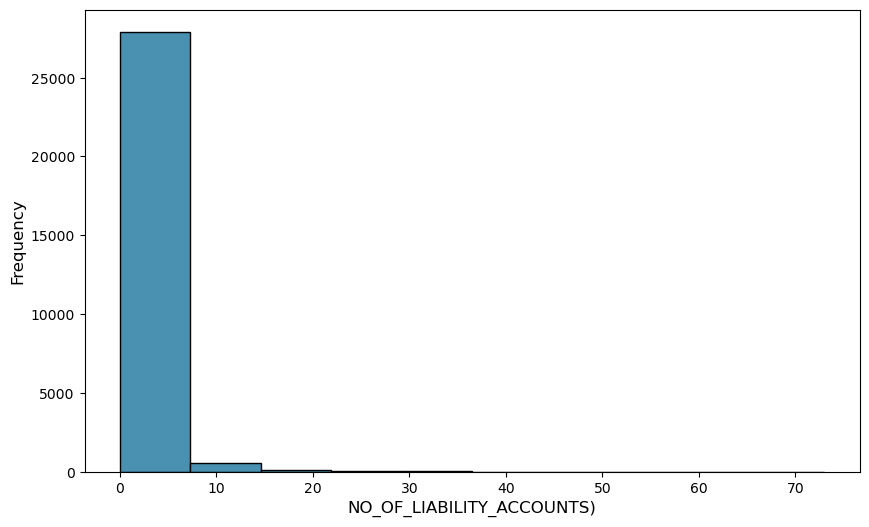

In [122]:
LNAMOUNT= df_loan['NO_OF_LIABILITY_ACCOUNTS']


plt.figure(figsize=(10, 6))
plt.hist(LNAMOUNT, bins=10, color='#4990b1', edgecolor='black')


plt.xlabel('NO_OF_LIABILITY_ACCOUNTS)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

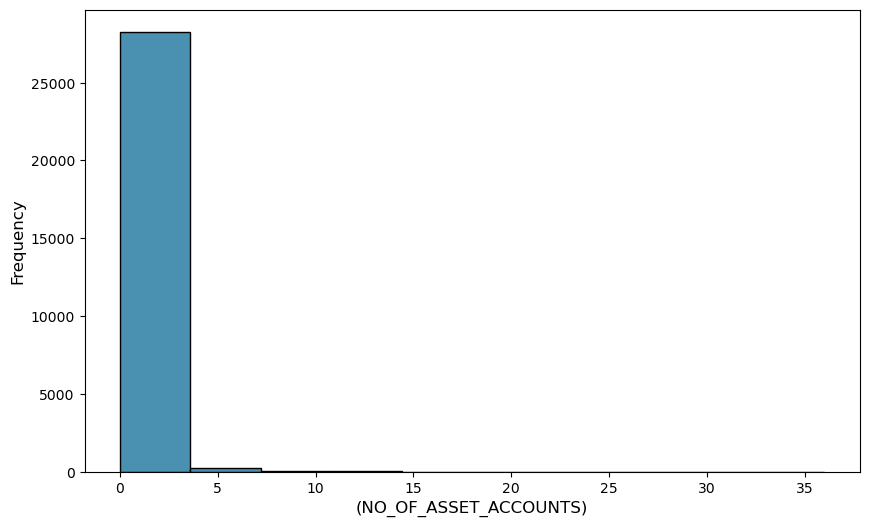

In [123]:
LNAMOUNT= df_loan['NO_OF_ASSET_ACCOUNTS']


plt.figure(figsize=(10, 6))
plt.hist(LNAMOUNT, bins=10, color='#4990b1', edgecolor='black')


plt.xlabel('(NO_OF_ASSET_ACCOUNTS)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [124]:
#df_loan1=df_loan.drop(columns=["LNAMOUNT","NET_INTEREST_INCOME_CAT","BAL_OS_cat","DPD_CATEGORY1","CreditCard_Usage_Category",
 #                              "DebitCard_Usage_Category"])

In [125]:
filepath=r"C://Users//15694//Desktop//Cross selling//code//Michelle//desc2.csv"
df_loan.to_csv(filepath, index=False)